In [ ]:
!pip install pymorphy2 --quiet
!pip install randan --quiet
!pip install pyLDAvis --quiet
# !pip install pyLDAvis==2.1.2 --quiet

In [ ]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install bertopic  --quiet

In [ ]:
!pip uninstall numba -Y
!pip install numba 

In [678]:
import os
import pandas as pd
import numpy as np
import nltk
from nltk.util import ngrams
import pickle
import sys

import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from randan.descriptive_statistics import ScaleStatistics
from randan.dimension_reduction import PCA
import ast
import warnings
warnings.filterwarnings('ignore')


### sklearn - LDA
import itertools

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings('ignore')


from tqdm import tqdm_notebook

from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from bertopic.representation import KeyBERTInspired

## gensim - LDA
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim

import pickle
import inspect
from copy import deepcopy

## BERT
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic

pickle

In [ ]:
os.chdir('/content/')
# —Ç–µ–∫—É—â–∞—è —Ä–∞–±–æ—á–∞—è –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è

In [ ]:
def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return sorted([var_name for var_name, var_val in callers_local_vars if var_val is var],key=lambda x: len(x))[-1]

In [ ]:
def p_load(name):
    return pickle.load(open(f'{name}.pickle', 'rb'))  

def p_list(var_list):
    vars_to_return = []
    for var_name in var_list:
      vars_to_return.append(p_load(var_name))
    return vars_to_return

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=1)

# Preprocessing

In [ ]:
vk_df = pd.read_csv('final_vk.csv',index_col=0).reset_index(drop=True)
vk_df = vk_df.iloc[vk_df.raw_text.drop_duplicates().index]
vk_df.text = vk_df.text.astype(str).apply(lambda x: ast.literal_eval(x))
vk_df.head()

raw_text              source   
0  –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ –∂–∏–≤—ã–º —Ü–≤–µ—Ç–∞–º - –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–µ —Ü–≤–µ—Ç–æ—á...  vsemvermi_messages  \
1  –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ –∫ —Ü–≤–µ—Ç–∞–º - –≠–∫–æ —Å–≤–µ—á–∏ —Ä—É—á–Ω–æ–π —Ä–∞–±–æ—Ç...  vsemvermi_messages   
2  –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ —Ü–≤–µ—Ç–∞–º - —Å–ª–∞–¥–∫–∏–π –ø–æ–¥–∞—Ä–æ–∫-–æ—Ç–∫—Ä—ã—Ç–∫–∞...  vsemvermi_messages   
3  –°–≤–µ—á–∏ –∏–∑ –Ω–∞—Ç—É—Ä–∞–ª—å–Ω–æ–≥–æ —Å–æ–µ–≤–æ–≥–æ –≤–æ—Å–∫–∞ ‚ú®Ô∏è\n\n–ü–æ–¥–∞...  vsemvermi_messages   
4  –ú—ã–ª—å–Ω—ã–µ –Ω–∞–±–æ—Ä—ã —Å –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–º —Å–æ—Å—Ç–∞–≤–æ–º, –∞–ª–æ—ç –≤–µ...  vsemvermi_messages   

                                                text  length  
0  [–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞, –∂–∏–≤–æ–π, —Ü–≤–µ—Ç, –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π, —Ü–≤–µ—Ç–æ...      18  
1  [–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞, —Ü–≤–µ—Ç, —Å–≤–µ—á–∞, —Ä—É—á–Ω–æ–π, —Ä–∞–±–æ—Ç–∞, –±–æ...      12  
2  [–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞, —Ü–≤–µ—Ç, —Å–ª–∞–¥–∫–∏–π, –ø–æ–¥–∞—Ä–æ–∫–æ—Ç–∫—Ä—ã—Ç–∫–∞,...      12  
3  [—Å–≤–µ—á–∞, –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π, —Å–æ–µ–≤—ã–π, –≤–æ—Å–∫, –ø–æ–¥–∞—Ä–æ—á–Ω—ã–π,...      18  
4  [–º—ã–ª—å–Ω—ã–π, –Ω–∞–±–æ—Ä, –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π, —Å–æ—Å—Ç–∞–≤, –∞–ª–æ—ç, –≤–µ...      13

In [ ]:
vk_df.shape

(14372, 4)

In [ ]:
vk_df.source.value_counts().to_frame()

count
source                              
zerowaste_ru_messages           5187
zerowasterus_messages           2373
greencospb_messages             1874
vk_rsbor_messages               1578
zero_waste_shop_messages         865
sobirator_messages               779
eco_sfera_messages               462
vk_ed_zbs_messages               432
vsemvermi_messages               270
zerowasteshop.moscow_messages    202
pererabotkinskaya_messages       134
zero_waste_style_messages        119
fruktowcaeco_messages             97

In [ ]:
# vk_df.source.value_counts().to_frame().merge(vk_cleaned.source.value_counts().to_frame(), on='source')

In [ ]:
vk_df.describe().T

count       mean        std   min   25%   50%   75%    max
length  14372.0  21.481144  16.357481  10.0  12.0  16.0  24.0  199.0

In [ ]:
vk_cleaned = vk_df.query('length >= 10')
# vk_cleaned = vk_df.query('length >= 10')
vk_cleaned.shape

(14372, 4)

In [ ]:
tg_df = pd.read_csv('final_tg.csv',index_col=0).reset_index(drop=True)
tg_df = tg_df.iloc[tg_df.raw_text.drop_duplicates().index]
tg_df.text = tg_df.text.astype(str).apply(lambda x: ast.literal_eval(x))
tg_df.head()

raw_text  source   
0  –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç! \n\n–£ –Ω–∞—Å –Ω–æ–≤–æ—Å—Ç–∏. –ú—ã –ø—Ä–∏–Ω—è–ª–∏ —Ä–µ—à...  zwsmos  \
1  –ú—ã —Ö–æ—Ç–∏–º –Ω–∞–ø–æ–º–Ω–∏—Ç—å –æ–± –æ—Å–Ω–æ–≤–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª–∞—Ö —Ö—Ä–∞–Ω–µ–Ω...  zwsmos   
2  –ö—É–¥—Ä—è–≤—ã–π –º–µ—Ç–æ–¥ aka —Ç—Ä–µ–Ω–¥ 2022üòÑ\n\n–î–µ–ª–∏—Ç–µ—Å—å —Å–≤–æ...  zwsmos   
3  –°–µ–≥–æ–¥–Ω—è —Ö–æ—Ç–∏–º –ø–æ–¥–µ–ª–∏—Ç—å—Å—è —Å –≤–∞–º–∏ —Å–ø–∏—Å–∫–æ–º —Ç–æ–≤–∞—Ä–æ...  zwsmos   
4  –ü–æ—á–µ–º—É –º—ã –≤—Å–µ–≥–¥–∞ —Å–æ–≤–µ—Ç—É–µ–º –≤—ã–±–∏—Ä–∞—Ç—å –∞–ª—é–º–∏–Ω–∏–µ–≤—É—é...  zwsmos   

                                                text  length  
0  [–ø—Ä–∏–≤–µ—Ç, –Ω–æ–≤–æ—Å—Ç—å, –ø—Ä–∏–Ω—è—Ç—å, —Ä–µ—à–µ–Ω–∏–µ, –∑–∞–∫—Ä—ã—Ç—å, —Å...      45  
1  [–Ω–∞–ø–æ–º–Ω–∏—Ç—å, –æ—Å–Ω–æ–≤–Ω—ã–π, –ø—Ä–∞–≤–∏–ª–æ, —Ö—Ä–∞–Ω–µ–Ω–∏–µ, –ø—Ä–æ–¥—É...      85  
2  [–∫—É–¥—Ä—è–≤—ã–π, –º–µ—Ç–æ–¥, —Ç—Ä–µ–Ω–¥, –¥–µ–ª–∏—Ç—å—Å—è, –ª–∞–π—Ñ—Ö–∞–∫, –∫—É...      23  
3  [–ø–æ–¥–µ–ª–∏—Ç—å—Å—è, —Å–ø–∏—Å–æ–∫, —Ç–æ–≤–∞—Ä, –ø–æ–º–æ—á—å, —Å–¥–µ–ª–∞—Ç—å, –≤...      79  
4  [—Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å, –≤—ã–±–∏—Ä–∞—Ç—å, –∞–ª—é–º–∏–Ω–∏–µ–≤—ã–π, –æ–±–æ—Ä–æ—Ç–Ω—ã–π,...      64

In [ ]:
tg_df.describe().T

count       mean        std   min   25%   50%   75%    max
length  4966.0  32.575312  30.877171  10.0  13.0  20.0  39.0  199.0

In [ ]:
tg_cleaned = tg_df.query('length >= 10')
tg_cleaned.shape

(4966, 4)

In [ ]:
tg_df.source.value_counts().to_frame().merge(tg_cleaned.source.value_counts().to_frame(), on='source')

count_x  count_y
source                                   
tg_ecochatik_messages       4074     4074
zwsmos                       281      281
osoznannoyepotrebleniye      233      233
my_green_bag_messages        232      232
tg_sobirator_messages        146      146

In [ ]:
def str_to_list(x):
  try:
    lst = ast.literal_eval(x)
  except:
    lst = []
  return lst

In [ ]:
# yt_df = pd.read_csv('full_yt_df2.csv',index_col=0).reset_index(drop=True)
# yt_df = yt_df.iloc[yt_df.raw_text.drop_duplicates().index]
# yt_df.text = yt_df.text.astype(str).apply(lambda x: str_to_list(x))
# yt_df = yt_df.rename(columns={'videoId': 'source'})
# # yt_df.source = 'yt'
# yt_df.head()

In [ ]:
# yt_df.source.value_counts()

In [ ]:
# yt_df.shape

In [ ]:
# yt_cleaned = yt_df.query('length >= 10')
# yt_cleaned.shape

In [ ]:
# yt_df.source.value_counts().to_frame().merge(yt_cleaned.source.value_counts().to_frame(), on='source')

In [ ]:
# yt_df.shape, yt_cleaned.shape

In [ ]:
# yt, vk, tg =yt_cleaned, vk_cleaned, tg_cleaned
vk, tg =vk_cleaned, tg_cleaned

# df = tg_cleaned
def generate_n_grams(sent, n):
  sent_n_grams = ngrams(sent,n)
  return ["_".join(ngram) for ngram in sent_n_grams]

for df in [
    # yt, 
    vk, tg]:

  bigrams = df.text.apply(lambda x: generate_n_grams(x, 2))
  df[f'2_grams'] = bigrams

  df['text_comma'] = df['text'].apply(lambda x: ','.join(map(str, x)))

  df['text_space'] = df['text_comma'].apply(lambda x: x.replace(',', ' '))

  df['2_grams_space'] = df['2_grams'].apply(lambda x: ' '.join(x))

df_all = pd.concat([
    # yt, 
    vk, tg])

In [ ]:
df_all.length.describe()

count    19338.000000
mean        24.330127
std         21.613432
min         10.000000
25%         12.000000
50%         17.000000
75%         27.000000
max        199.000000
Name: length, dtype: float64

In [ ]:
docs_df_all_1 = df_all['text_space'].tolist()
docs_df_all_2 = df_all['2_grams_space'].tolist()

In [ ]:
docs_df_all_2[:5]

['–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞_–∂–∏–≤–æ–π –∂–∏–≤–æ–π_—Ü–≤–µ—Ç —Ü–≤–µ—Ç_–Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π_—Ü–≤–µ—Ç–æ—á–Ω—ã–π —Ü–≤–µ—Ç–æ—á–Ω—ã–π_—ç—Ñ–∏—Ä–Ω—ã–π —ç—Ñ–∏—Ä–Ω—ã–π_–º–∞—Å–ª–æ –º–∞—Å–ª–æ_–ø–∞—Ä—Ñ—é–º –ø–∞—Ä—Ñ—é–º_–≥–∞—Ä–º–æ–Ω–∏–∑–∞—Ç–æ—Ä –≥–∞—Ä–º–æ–Ω–∏–∑–∞—Ç–æ—Ä_—ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π_—Å–æ—Å—Ç–æ—è–Ω–∏–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ_—Å—Ä–µ–¥—Å—Ç–≤–æ —Å—Ä–µ–¥—Å—Ç–≤–æ_—É–ª—É—á—à–µ–Ω–∏–µ —É–ª—É—á—à–µ–Ω–∏–µ_–≥–æ—Ä–º–æ–Ω–∞–ª—å–Ω—ã–π –≥–æ—Ä–º–æ–Ω–∞–ª—å–Ω—ã–π_—Å–æ—Å—Ç–æ—è–Ω–∏–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ_–∂–µ–Ω—Å–∫–∏–π –∂–µ–Ω—Å–∫–∏–π_–≥—Ä—É–ø–ø–∞ –≥—Ä—É–ø–ø–∞_–º–∞—Å–ª–æ',
 '–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞_—Ü–≤–µ—Ç —Ü–≤–µ—Ç_—Å–≤–µ—á–∞ —Å–≤–µ—á–∞_—Ä—É—á–Ω–æ–π —Ä—É—á–Ω–æ–π_—Ä–∞–±–æ—Ç–∞ —Ä–∞–±–æ—Ç–∞_–±–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –±–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—ã–π_–∞—Ä–æ–º–∞—Ç –∞—Ä–æ–º–∞—Ç_–æ—Ç–∫—Ä—ã—Ç–∫–∞ –æ—Ç–∫—Ä—ã—Ç–∫–∞_–∫—Ä–∞—Å–∏–≤—ã–π –∫—Ä–∞—Å–∏–≤—ã–π_—É–ø–∞–∫–æ–≤–∫–∞ —É–ø–∞–∫–æ–≤–∫–∞_–∏–¥—Ç–∏ –∏–¥—Ç–∏_—Å—Ç–æ–∏–º–æ—Å—Ç—å',
 '–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞_—Ü–≤–µ—Ç —Ü–≤–µ—Ç_—Å–ª–∞–¥–∫–∏–π —Å–ª

# Vectorizer

In [630]:
def vectorizer(df, ngram_range=(1,1), min_df=5, mode='c'):
  if mode == 'c':
      cvect = CountVectorizer(ngram_range=ngram_range,min_df=min_df).fit(df['text_space'])
      cmatrix = cvect.transform(df['text_space'])
      cmatrix = pd.DataFrame(cmatrix.toarray(), columns = cvect.get_feature_names_out(), index=df.index)
      return cvect, cmatrix

  elif mode == 'tf':
      tfidfvect = TfidfVectorizer(ngram_range=ngram_range,min_df=min_df).fit(df['text_space'])
      tfidfmatrix = tfidfvect.transform(df['text_space'])
      tfidfmatrix = pd.DataFrame(tfidfmatrix.toarray(), columns = tfidfvect.get_feature_names_out(), index=df.index)

      return  tfidfvect, tfidfmatrix

In [ ]:
def break_string(string, length):
    return '\n\t'.join(string[i:i+length] for i in range(0, len(string), length))

In [ ]:
cvect_1, cmatrix_1 = vectorizer(df_all, ngram_range=(1,1), min_df=15, mode='c')
cvect_2, cmatrix_2 = vectorizer(df_all, ngram_range=(2,2), min_df=5, mode='c')
cvect_3, cmatrix_3 = vectorizer(df_all, ngram_range=(3,3), min_df=2, mode='c')
cmatrix_1.shape,cmatrix_2.shape,cmatrix_3.shape

((19338, 4320), (19338, 4147), (19338, 5186))

In [ ]:
# cvect_1.build_analyzer()

functools.partial(<function _analyze at 0x7f3155a53250>, ngrams=<bound method _VectorizerMixin._word_ngrams of CountVectorizer(min_df=15)>, tokenizer=<built-in method findall of re.Pattern object at 0x7f2fa75a9ee0>, preprocessor=functools.partial(<function _preprocess at 0x7f31559f83a0>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of CountVectorizer(min_df=15)>, stop_words=None)

In [ ]:
# tfvect_1, tfmatrix_1 = vectorizer(df_all, ngram_range=(1,1), min_df=15, mode='tf')
# tfvect_2, tfmatrix_2 = vectorizer(df_all, ngram_range=(2,2), min_df=5, mode='tf')
# tfvect_3, tfmatrix_3 = vectorizer(df_all, ngram_range=(3,3), min_df=5, mode='tf')
# tfmatrix_1.shape, tfmatrix_2.shape, tfmatrix_3.shape

((19338, 4320), (19338, 4147), (19338, 245))

# TM functions

##LDA - sklearn

In [ ]:
def get_coherence_mean(model, texts, n_top_words=10):
    """–ü–æ–ª—É—á–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–π –æ—Ü–µ–Ω–∫–∏ –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏"""
    
    # –∫–æ–ª-–≤–æ —Ç–µ–º
    topics = model.components_
    
    # –ø–æ–ª—É—á–µ–Ω–∏–µ —Ç–æ–∫–µ–Ω–æ–≤
    texts = [[word for word in doc.split()] for doc in texts]
    # —Å–æ–∑–¥–∞–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º gensim
    dictionary = corpora.Dictionary(texts)

    # –ö–æ—Ä–ø—É—Å –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–∞—Ç—Ä–∏—Ü—ã –ø–æ–¥—Å—á–µ—Ç–∞ —Å–ª–æ–≤
    corpus = [dictionary.doc2bow(text) for text in texts]

    feature_names = [dictionary[i] for i in range(len(dictionary))]

    # –ü–æ–ª—É—á–µ–Ω–∏–µ –¢–û–ü-—Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
    top_words = []
    for topic in topics:
        top_words.append(
            [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

    coherence_model = CoherenceModel(topics=top_words,
                                     texts=texts,
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

def compute_coherence_values(vec_train_text,
                             test_text,
                             min_topic=2,
                             max_topic=40,
                             step=5):
    """–í—ã—á–∏—Å–ª–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª-–≤–∞ —Ç–µ–º–∞—Ç–∏–∫"""
    
    coherence_values = []
    model_list = []

    for num_topics in tqdm_notebook(range(min_topic, max_topic, step)):
        model = LatentDirichletAllocation(
            max_iter=10,
            n_components=num_topics,
            learning_method='online',
            random_state=10,
            n_jobs=-1, 
        )
        model.fit(vec_train_text)

        model_list.append(model)
        coherence_values.append(get_coherence_mean(model, test_text))

    return model_list, coherence_values

def compute_best_model(vec_train_text,test_text, min_topic=5, max_topic=15,step=1):
    model_list, coherence_values = compute_coherence_values(vec_train_text=vec_train_text,test_text=test_text,
                                                            min_topic=min_topic,max_topic=max_topic,step=step)

    
    x = range(min_topic, max_topic, step)
    plt.figure(figsize=(6, 4))
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.show()

    # for n_topics, coherence in zip(x, coherence_values): 
        # print(f"Num Topics = {n_topics}, Coherence = {coherence:.3f}")
    
    best_model_component =  sorted(list(zip(x, coherence_values)), key=lambda x: x[1], reverse=True)[0][0]
    print('best_model_component:', best_model_component)
    return best_model_component

def show_topics(vectorizer, model, n_words=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    top_words = []
    
    # –ø—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–π —Ç–µ–º–µ
    for topic_weights in model.components_:
        # —Å–æ—Ä—Ç–∏—Ä—É–µ–º –≤–µ—Å–∞ –ø–æ —É–±—ã–≤–∞–Ω–∏—é (–¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –∏–∑ —Å–ª–æ–≤–∞—Ä—è) –∏ –±–µ—Ä–µ–º –¢–û–ü-N —Å–ª–æ–≤
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        # –±–µ—Ä–µ–º id –¢–û–ü —Å–ª–æ–≤ –∏–∑ —Å–ª–æ–≤–∞—Ä—è (—Å–æ–≥–ª–∞—Å–Ω–æ –≤–µ—Å–∞–º)
        top_words.append(feature_names.take(top_keyword_locs))
    
    df_topic_keywords = pd.DataFrame(top_words)
    df_topic_keywords.columns = ['Word ' + str(i) for i in range(df_topic_keywords.shape[1])]
    df_topic_keywords.index = ['Topic ' + str(i + 1) for i in range(df_topic_keywords.shape[0])]
    return df_topic_keywords

In [ ]:
def lda_cycle(
    data_frame,
    vectorizer='count',
    # cycle
    min_topic=5,max_topic=15,step=1,
    # vectorizer
    analyzer='word',
    min_df=20,
    ngram_range=(2, 2),
    # lda_model
    max_iter=10,

  ):

  df_list = data_frame.text_space.tolist()

  if vectorizer == 'count':
    vector_ben = CountVectorizer(
        analyzer=analyzer,
        min_df=min_df,
        ngram_range=ngram_range
        )
    
  elif vectorizer == 'tfidf':
    vector_ben = TfidfVectorizer(
        analyzer=analyzer,
        min_df=min_df,
        ngram_range=ngram_range
        )

  
  train_vec_ben = vector_ben.fit_transform(df_list)

  best_model_component = compute_best_model(train_vec_ben,df_list,
                                            min_topic=min_topic,
                                            max_topic=max_topic,
                                            step=step)

  lda_model_ben = LatentDirichletAllocation(

    n_components=best_model_component,
    max_iter=10,
    learning_method='online',
    random_state=10,n_jobs=-1,
    )
  lda_model_ben.fit(train_vec_ben)

  df_topic_keywords = show_topics(vectorizer=vector_ben,
                              model=lda_model_ben,
                              n_words=10)

  pyLDAvis.enable_notebook()
  panel = pyLDAvis.lda_model.prepare(lda_model_ben,
                                  train_vec_ben,
                                  vector_ben,
                                  mds='tsne')
  panel

  return train_vec_ben,lda_model_ben, df_topic_keywords,panel


In [ ]:
def topic_info_lda(df, vec_data,model,words):
  topic_proba = model.transform(vec_data)
  topic_dist = pd.Series(np.argmax(topic_proba, axis=1))
  groupedvalues = pd.Series(np.argmax(topic_proba, axis=1)).value_counts().reset_index().sort_values(by='index')
  groupedvalues['index'] = groupedvalues['index'] + 1
  # —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–ø–∏–∫–æ–≤
  # sns.despine(bottom = True, left = True)
  ax = sns.barplot(groupedvalues ,x='count',y='index', orient='h',)
  ax.set_frame_on(False)
  for index, row in groupedvalues.iterrows():
      ax.text(row['count'],row['index']-1,row['count'],
              color='black', ha='left',fontweight=549)
  plt.ylabel('Topic')
  plt.show()


  data = model.transform(vec_data)

  top_indices = np.argsort(-data, axis=0)[:3, :].T
  top_20_indices = np.argsort(-data, axis=0)[:20, :].T
  for num in range(top_indices.shape[0]):
    print(f'Topic ‚Ññ{num+1};', ' | '.join(words.T.iloc[:5,num].values))
    # print(topic, ' | '.join([word[0] for word in topic_dict[topic]][:5]))
    # messages =df.iloc[top_indices[num]].raw_text.values
    # for i, msg in enumerate(messages):
    #   print(f'{i+1}. ', re.sub('\s+',' ',msg)[:200])
    print()
  
  # return top_20_indices

In [ ]:
def compute_best_models(vec_train_text,test_text, min_topic=5, max_topic=15,step=1):

    model_list, coherence_values = compute_coherence_values(vec_train_text=vec_train_text,test_text=test_text,
                                                            min_topic=min_topic,max_topic=max_topic,step=step)

    # best_model_component =  sorted(list(zip(x, coherence_values)), key=lambda x: x[1], reverse=True)[0][:3]
    # print('best_model_component:', best_model_component)

    model_list = list(zip(list(range(min_topic, max_topic, step)),
                          model_list, coherence_values))
    
    return model_list, coherence_values 

In [ ]:
def topics_show_lda(
    models, means,
    vetorizer,matrix,
    n_models=3,
  ):

  model_list = list(zip([model.n_components for model in models], models, means))
  
  best_models = sorted(model_list, key=lambda x: x[2], reverse=True)[:n_models]


  for model in best_models:
    # print(model[1])
    df_topic_keywords = show_topics(vectorizer=vetorizer,
                                model=model[1],
                                n_words=5)

    # model = model[1]
    topic_proba = model[1].transform(matrix)
    topic_dist = pd.Series(np.argmax(topic_proba, axis=1))
    groupedvalues = pd.Series(np.argmax(topic_proba, axis=1)).value_counts().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
    groupedvalues.rename(columns={'index': 'topic'},inplace=True)
    groupedvalues['topic'] = groupedvalues['topic'] + 1

    topics = [' | '.join(row) for row in df_topic_keywords.values] #—Å–ª–æ–≤–∞ –≤ —Ç–æ–ø–∏–∫–∞—Ö

    ax = sns.barplot(x=groupedvalues['count'],y=groupedvalues.index, orient='h', )
    ax.bar_label(ax.containers[0],
                labels=[f'{int(value)} {words}' for value,words in zip(ax.containers[0].datavalues, topics)]
                )
    topic_names = [f'Topic {i}' for i in groupedvalues['topic']]
    ax.set_yticklabels(topic_names)
    ax.set_frame_on(False)
    plt.xlabel('Count')
    plt.ylabel('Topic')
    plt.title(f'Model with {model[0]} topics')
    plt.show()

## LSA

In [ ]:
def lsa_compute_best_model(matrix, docs, min_topics, max_topics, step):
  svd_models = []; svd_means = []
  for n_topics in range(min_topics, max_topics, step):
      svd = TruncatedSVD(n_components=n_topics, n_iter=5, random_state=42)
      svd.fit(matrix)
      coh_mean = get_coherence_mean(svd,docs)
      svd_models.append([n_topics, svd])
      svd_means.append([n_topics, coh_mean])
  return svd_models, svd_means

In [ ]:
def topics_show_lsa(
    models, means,
    vetorizer,matrix,
    n_models=3,
  ):

  model_list = list(zip([i[0] for i in models] ,[i[1] for i in models], [i[1] for i in means]))
  best_models = sorted(model_list, key=lambda x: x[2], reverse=True)[:n_models]


  for model in best_models:
    # print(model[1])
    df_topic_keywords = show_topics(vectorizer=vetorizer,
                                model=model[1],
                                n_words=5)

    # model = model[1]
    topic_proba = model[1].transform(matrix)
    topic_dist = pd.Series(np.argmax(topic_proba, axis=1))
    groupedvalues = pd.Series(np.argmax(topic_proba, axis=1)).value_counts().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
    groupedvalues.rename(columns={'index': 'topic'},inplace=True)
    groupedvalues['topic'] = groupedvalues['topic'] + 1

    topics = [' | '.join(row) for row in df_topic_keywords.values] #—Å–ª–æ–≤–∞ –≤ —Ç–æ–ø–∏–∫–∞—Ö

    ax = sns.barplot(x=groupedvalues['count'],y=groupedvalues.index, orient='h', )
    ax.bar_label(ax.containers[0],
                labels=[f'{int(value)} {words}' for value,words in zip(ax.containers[0].datavalues, topics)]
                )
    topic_names = [f'Topic {i}' for i in groupedvalues['topic']]
    ax.set_yticklabels(topic_names)
    ax.set_frame_on(False)
    plt.xlabel('Count')
    plt.ylabel('Topic')
    plt.title(f'Model with {model[0]} topics')
    plt.show()

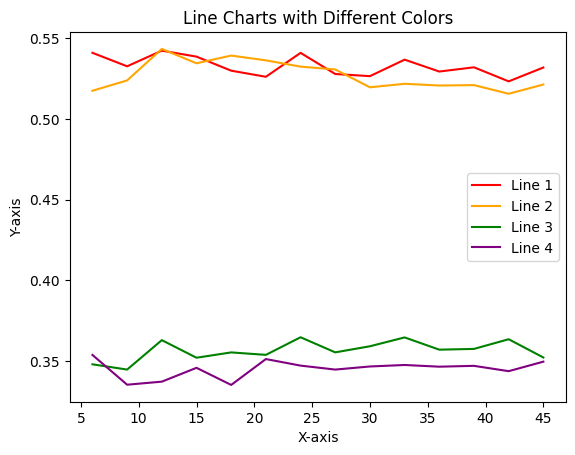

In [ ]:
fig, ax = plt.subplots()
x= [i[0] for i in svd_means_c_1]

# Plot the line charts with different colors
ax.plot(x, [i[1] for i in svd_means_c_1],
        color='red', label='Line 1')
ax.plot(x, [i[1] for i in svd_means_tf_1], color='orange', label='Line 2')
ax.plot(x, [i[1] for i in svd_means_c_2], color='green', label='Line 3')
ax.plot(x, [i[1] for i in svd_means_tf_2], color='purple', label='Line 4')

# Set axis labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Charts with Different Colors')
# Add legend
ax.legend()
# Show the plot
plt.show()


## Bertopic

In [ ]:
def advanced_bert(docs, nr_topics=10, min_dist=0.5, n_components=3, vectorizer='count',ngram_range=(2,3), top_n_words=5):
    embedding_model = SentenceTransformer('DeepPavlov/rubert-base-cased-sentence'),
    umap_model = UMAP(n_neighbors=3, n_components=n_components, min_dist=min_dist,random_state=42)
    hdbscan_model = HDBSCAN(min_cluster_size=80, min_samples=40,
                            gen_min_span_tree=True,
                            prediction_data=True)
    
    if vectorizer == 'count':
        vectorizer_model = CountVectorizer(ngram_range=ngram_range)
    
    elif vectorizer == 'tfidf':
        vectorizer_model = TfidfVectorizer(ngram_range=ngram_range)

    model = BERTopic(nr_topics=nr_topics, umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        embedding_model=embedding_model,
        vectorizer_model=vectorizer_model,
        top_n_words=top_n_words,
        language='multilingual',
        calculate_probabilities=True,
        verbose=True)
    
    topics, probs = model.fit_transform(docs)
    return model, topics, probs

In [ ]:
def topic_info_bert(model, topics, docs,df):
  groupedvalues = pd.Series(topics).value_counts().reset_index().sort_values(by='index')
  # —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–ø–∏–∫–æ–≤
  ax = sns.barplot(groupedvalues ,x='count',y='index', orient='h', palette='Set3')
  for index, row in groupedvalues.iterrows():
      ax.text(row['count'],row['index']+1,row['count'],
              color='black', ha='left',fontweight=549)
  plt.ylabel('Topic')
  plt.show()

  docs_info= model.get_document_info(docs)
  docs_info = docs_info[docs_info.Representative_document == True]
  topics = docs_info.sort_values(by='Topic').Topic.unique()
  topic_dict = model.get_topics()

  for topic in topics[1:]:
    ind = docs_info[docs_info.Topic == topic].index
    print(topic, ' | '.join([word[0] for word in topic_dict[topic]][:5]))
    messages = df.iloc[docs_info[docs_info.Topic ==topic].index].raw_text.values
    for i, msg in enumerate(messages):
      # print(re.sub('\s+',' ',msg)[:200])
      print(i+1, break_string(re.sub('\s+',' ',msg), 100))
    print()

In [ ]:
# https://github.com/MaartenGr/BERTopic/issues/90
# https://stackoverflow.com/questions/70548316/gensim-coherencemodel-gives-valueerror-unable-to-interpret-topic-as-either-a-l
def get_coherence_bert(topic_model, docs, n_top_words=10):
    """–ü–æ–ª—É—á–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–π –æ—Ü–µ–Ω–∫–∏ –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏"""
    vectorizer = topic_model.vectorizer_model
    X = vectorizer.fit_transform(docs)
    # doc_tokens = [text.split(" ") for text in docs]

    # id2word = corpora.Dictionary(doc_tokens)
    # texts = doc_tokens
    analyzer = vectorizer.build_analyzer()

    tokens = [analyzer(doc) for doc in docs]
    dictionary = corpora.Dictionary(tokens)

    corpus = [dictionary.doc2bow(token) for token in tokens]
    # corpus = [id2word.doc2bow(text) for text in texts]

    topic_words = []
    for i in range(len(topic_model.get_topic_freq())-1):
      interim = []
      interim = [t[0] for t in topic_model.get_topic(i)]
      topic_words.append(interim)

    coherence_model = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()

    return coherence 

In [ ]:
def bert_compute_best_models(docs,ngram_range=(1, 1), min_df=10,
                             min_topics=10, max_topics=26, step=3):
  bert_means = []
  topic_infos = []

  bert = BERTopic(language="multilingual", calculate_probabilities=True,
                    verbose=True,
                    min_topic_size=30,
                    vectorizer_model=CountVectorizer(ngram_range=ngram_range, min_df=min_df)
                    )
  bert_topics, bert_probs = bert.fit_transform(docs)
  # return bert


  for nr_topics in tqdm_notebook(range(min_topics, max_topics, step)):

    bert_to_reduce = deepcopy(bert)
    bert_to_reduce.reduce_topics(docs, nr_topics=nr_topics)
    coherence = get_coherence_bert(bert_to_reduce, docs)

    bert_means.append([nr_topics, coherence])
    topic_infos.append(bert_to_reduce.get_topic_info())
    del bert_to_reduce

  return bert_means,topic_infos

In [ ]:
def topics_show_bert(
  bert_means, topic_info,n_models=3,keywords=None
  ):
  topic_info_list = list(zip([i[0] for i in bert_means],
                             [i[1] for i in bert_means], 
                              topic_info)
  )
  
  if keywords is None:
    keywords = groupedvalues.Name.apply(lambda x: ' | '.join(x.split('_')[1:]))

  best_models = sorted(topic_info_list, key=lambda x: x[1], reverse=True)[:n_models]

  for topic_table in best_models:
    groupedvalues = topic_table[2]
    plt.figure(figsize=(10,10))
    ax = sns.barplot(x=groupedvalues['Count'],y=groupedvalues.index, orient='h', )
    ax.bar_label(ax.containers[0],
                # labels=groupedvalues.Name
                labels = groupedvalues.Count.astype(str)+ ' ' + keywords
                )
    topic_names = [f'Topic {i}' for i in groupedvalues['Topic']]
    ax.set_yticklabels(topic_names)
    ax.set_frame_on(False)
    plt.xlabel('Count')
    plt.ylabel('Topic')
    plt.title(f'Model with {topic_table[0]} topics')
    plt.show()

# –ü—Ä–æ–≥–æ–Ω–∫–∞ –º–æ–¥–µ–ª–µ–π

In [ ]:
os.chdir('/content/drive/MyDrive/TM Models')

## LSA

In [ ]:
%%time
svd_models_c_1,svd_means_c_1 = lsa_compute_best_model(cmatrix_1, docs_df_all_1,10, 26, 3)
svd_models_tf_1,svd_means_tf_1 = lsa_compute_best_model(tfmatrix_1, docs_df_all_1,10, 26, 3)
svd_models_c_2,svd_means_c_2 = lsa_compute_best_model(cmatrix_2, docs_df_all_2, 10, 26, 3)
svd_models_tf_2,svd_means_tf_2 = lsa_compute_best_model(tfmatrix_2, docs_df_all_2,10, 26, 3)

CPU times: user 5min 18s, sys: 2min 43s, total: 8min 2s
Wall time: 4min 15s


## sklearn - LDA

In [ ]:
lda_models_c_1, lda_means_c_1 = compute_coherence_values(vec_train_text=cmatrix_1, test_text=docs_df_all_1,
                                                            min_topic=10, max_topic=26, step=3)

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
lda_models_tf_1, lda_means_tf_1 = compute_coherence_values(vec_train_text=tfmatrix_1, test_text=docs_df_all_1,
                                                            min_topic=10, max_topic=26, step=3)

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
lda_models_c_2, lda_means_c_2 = compute_coherence_values(vec_train_text=cmatrix_2, test_text=docs_df_all_2,
                                                            min_topic=10, max_topic=26, step=3)

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
lda_models_tf_2, lda_means_tf_2 = compute_coherence_values(vec_train_text=tfmatrix_2, test_text=docs_df_all_2,
                                                            min_topic=10, max_topic=26, step=3)

  0%|          | 0/6 [00:00<?, ?it/s]

## BERTopic 

In [ ]:
bert_means_1,topic_infos_1 = bert_compute_best_models(docs_df_all_1, 
                             min_topics=10, max_topics=26, step=3)

Batches:   0%|          | 0/605 [00:00<?, ?it/s]

2023-05-29 01:19:05,541 - BERTopic - Transformed documents to Embeddings
2023-05-29 01:19:19,762 - BERTopic - Reduced dimensionality
2023-05-29 01:19:24,622 - BERTopic - Clustered reduced embeddings


  0%|          | 0/6 [00:00<?, ?it/s]

2023-05-29 01:19:31,598 - BERTopic - Reduced number of topics from 65 to 10
2023-05-29 01:19:38,871 - BERTopic - Reduced number of topics from 65 to 13
2023-05-29 01:19:46,006 - BERTopic - Reduced number of topics from 65 to 16
2023-05-29 01:19:52,743 - BERTopic - Reduced number of topics from 65 to 19
2023-05-29 01:20:01,142 - BERTopic - Reduced number of topics from 65 to 22
2023-05-29 01:20:08,318 - BERTopic - Reduced number of topics from 65 to 25


In [ ]:
bert_means_2,topic_infos_2 = bert_compute_best_models(docs_df_all_1, 
                                           min_df=2, ngram_range=(2, 2), 
                             min_topics=10, max_topics=26, step=3)

Batches:   0%|          | 0/605 [00:00<?, ?it/s]

2023-05-29 01:49:30,204 - BERTopic - Transformed documents to Embeddings
2023-05-29 01:49:44,453 - BERTopic - Reduced dimensionality
2023-05-29 01:49:51,276 - BERTopic - Clustered reduced embeddings


  0%|          | 0/6 [00:00<?, ?it/s]

2023-05-29 01:50:01,212 - BERTopic - Reduced number of topics from 69 to 10
2023-05-29 01:50:11,120 - BERTopic - Reduced number of topics from 69 to 13
2023-05-29 01:50:21,471 - BERTopic - Reduced number of topics from 69 to 16
2023-05-29 01:50:32,751 - BERTopic - Reduced number of topics from 69 to 19
2023-05-29 01:50:42,931 - BERTopic - Reduced number of topics from 69 to 22
2023-05-29 01:50:53,562 - BERTopic - Reduced number of topics from 69 to 25


In [ ]:
topics_show_bert(bert_means_1,topic_infos_1)

In [ ]:
topics_show_bert(bert_means_2,topic_infos_2)

### archieve

In [ ]:
# bert_c_1 = BERTopic(language="multilingual", calculate_probabilities=True,
#                        verbose=True,min_topic_size=20, nr_topics=20,
#                        vectorizer_model=CountVectorizer(ngram_range=(1, 1), min_df=15))
# bert_topics_c_1, bert_probs_c_1 = bert_c_1.fit_transform(docs_df_all_1)
# coherence = get_coherence_bert(bert_c_1, docs_df_all_1)
# coherence

Batches:   0%|          | 0/605 [00:00<?, ?it/s]

2023-05-29 00:39:42,444 - BERTopic - Transformed documents to Embeddings
2023-05-29 00:39:57,079 - BERTopic - Reduced dimensionality
2023-05-29 00:40:05,537 - BERTopic - Clustered reduced embeddings


0.5158629283038592

In [ ]:
# docs_df_all_1

In [ ]:
# topic_model_df_all_1.visualize_topics()

In [ ]:
# topic_model_df_all_1.visualize_hierarchy(top_n_topics=50, width=800)

In [ ]:
# topic_model_df_all_1.visualize_barchart(top_n_topics=20)

–ë–∏–≥—Ä–∞–º–º—ã

In [ ]:
# topic_model_df_all_2 = BERTopic(language="multilingual", calculate_probabilities=True,
#                        verbose=True)
# topics_df_all_2, probs_df_all_2 = topic_model_df_all_2.fit_transform(docs_df_all_2)

Batches:   0%|          | 0/605 [00:00<?, ?it/s]

2023-05-28 05:17:54,113 - BERTopic - Transformed documents to Embeddings
2023-05-28 05:18:08,273 - BERTopic - Reduced dimensionality
2023-05-28 05:18:27,321 - BERTopic - Clustered reduced embeddings


In [ ]:
# topic_model_tg_2.save('/content/drive/MyDrive/TM Models/topics_df_all_2')

In [ ]:
for i,j in topic_model_df_all_2.get_topic_info().head(50)[['Count','Name']].iterrows():
  print(j.Count, j.Name)

10152 -1_—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_–æ–∫—Ä—É–∂–∞—Ç—å_—Å—Ä–µ–¥–∞_–ø—É–Ω–∫—Ç_–ø—Ä–∏—ë–º_–ø–∏—â–µ–≤–æ–π_–æ—Ç—Ö–æ–¥
1353 0_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–ø–∞–∫–µ—Ç_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–±—É—Ç—ã–ª–∫–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_—É–ø–∞–∫–æ–≤–∫–∞_–ø–ª–∞—Å—Ç–∏–∫_—Å—Ç–µ–∫–ª–æ
625 1_–¥–µ—Ç—Å–∫–∏–π_—Å–∞–¥_–¥–µ—Ç—Å–∫–∏–π_–ø–ª–æ—â–∞–¥–∫–∞_—Ä–µ–±—ë–Ω–æ–∫_—à–∫–æ–ª–∞_—Ä–æ–¥–∏—Ç–µ–ª—å_—Ä–µ–±—ë–Ω–æ–∫
602 2_–æ—Ç–∫—Ä—ã—Ç—å_–º–∞–≥–∞–∑–∏–Ω_—Ç–æ–≤–∞—Ä_—É–ø–∞–∫–æ–≤–∫–∞_–ø—Ä–æ–¥–∞–≤–∞—Ç—å_—Ç–æ–≤–∞—Ä_–∏–Ω—Ç–µ—Ä–Ω–µ—Ç_–º–∞–≥–∞–∑–∏–Ω
347 3_—Ç–≤—ë—Ä–¥—ã–π_—à–∞–º–ø—É–Ω—å_–º—ã—Ç—å—ë_–ø–æ—Å—É–¥–∞_–∂–∏–¥–∫–∏–π_–º—ã–ª–æ_—Ö–æ–∑—è–π—Å—Ç–≤–µ–Ω–Ω—ã–π_–º—ã–ª–æ
338 4_—Å–±–æ—Ä_–º—É—Å–æ—Ä_–ø–∏—â–µ–≤–æ–π_–æ—Ç—Ö–æ–¥_—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å_–º—É—Å–æ—Ä
318 5_—Å—Ç–∞—Ä—ã–π_–æ–¥–µ–∂–¥–∞_–Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π_–∫–æ–∂–∞_–Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π_—Ç–∫–∞–Ω—å_–ø–æ—Å—Ç–µ–ª—å–Ω—ã–π_–±–µ–ª—å—ë
294 6_—Ä—É—Å—Å–∫–∏–π_—è–∑—ã–∫_—Ä–æ—Å—Å–∏–π—Å–∫–∏–π_—Ñ–µ–¥–µ—Ä–∞—Ü–∏—è_–∫–æ–º–∏—Ç–µ—Ç_—Ä–æ—Å—Å–∏–π—Å–∫–∏–π_–≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω

In [ ]:
topic_model_df_all_2.visualize_topics()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 146/146 [00:01<00:00, 83.19it/s]


In [ ]:
hierarchical_topics_all_2 = topic_model_df_all_2.hierarchical_topics(docs_df_all_2)
topic_model_df_all_2.visualize_hierarchy(hierarchical_topics=hierarchical_topics_all_2)

In [ ]:
tree_all_2 = topic_model_df_all_2.get_topic_tree(hierarchical_topics_all_2)
print(tree_all_2)

.
‚îú‚îÄ–∏–∑–¥–µ–ª–∏–µ_–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—è_–º–∞—Ç–µ—Ä–∏–∞–ª_–∏–∑–¥–µ–ª–∏–µ_—Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã–π_–º–∞—Ç–µ—Ä–∏–∞–ª_–æ–±—ä—ë–º_—Å–≤–∞–ª–∫–∞_–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—è_–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å—Å—è
‚îÇ    ‚îú‚îÄ‚ñ†‚îÄ‚îÄ—Å–≤–∞–ª–∫–∞_—Ç–±–æ_–æ–±—ä—ë–º_—Å–≤–∞–ª–∫–∞_–ø–æ—ç–ª–µ–º–µ–Ω—Ç–Ω—ã–π_–¥–µ–º–æ–Ω—Ç–∞–∂_—Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã–π_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—è_—Å–æ—Ç–Ω—è_—Ä–∞–∑–ª–∏—á–Ω—ã–π ‚îÄ‚îÄ Topic: 120
‚îÇ    ‚îî‚îÄ‚ñ†‚îÄ‚îÄ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—è_–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å—Å—è_–∏–∑–¥–µ–ª–∏–µ_–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—è_–º–∞—Ç–µ—Ä–∏–∞–ª_–∏–∑–¥–µ–ª–∏–µ_–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ_—Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã–π_—Å–∏—Å—Ç–µ–º–∞_–ø–æ–≤ ‚îÄ‚îÄ Topic: 126
‚îî‚îÄ—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_–æ–∫—Ä—É–∂–∞—Ç—å_—Å—Ä–µ–¥–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–±—É—Ç—ã–ª–∫–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–ø–∞–∫–µ—Ç_—Å–±–æ—Ä_–º—É—Å–æ—Ä
     ‚îú‚îÄ—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–±—É—Ç—ã–ª–∫–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–ø–∞–∫–µ—Ç_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_—É–ø–∞–∫–æ–≤–∫–∞_—Å–±–æ—Ä_–º—É—Å–æ—Ä
     ‚îÇ    ‚îú‚îÄ–¥–≤–∏–∂–µ–Ω–∏–µ_—Ä–∞–∑–¥–µ

In [ ]:
topic_model_df_all_2.visualize_heatmap()

In [ ]:
topic_model_df_all_2.visualize_term_rank()

In [ ]:
topic_model_df_all_2.visualize_term_rank()
topic_model_df_all_2.visualize_barchart(top_n_topics=20)

In [ ]:
pd.Series(topics_df_all_2).value_counts()[:20]

In [ ]:
topic_info_bert(topic_model_df_all_2,topics_df_all_2,docs_df_all_2,df_all)

#### reduction

In [ ]:
topic_model_df_all_2_red = deepcopy(topic_model_df_all_2)

In [ ]:
topic_model_df_all_2_red.reduce_topics(docs_df_all_2, nr_topics=20)

2023-05-28 05:45:04,662 - BERTopic - Reduced number of topics from 148 to 20


In [ ]:
# topic_model_df_all_2_red.save('/content/drive/MyDrive/TM Models/topic_model_df_all_2_red')

In [ ]:
topics_df_all_2_red =  topic_model_df_all_2_red.get_document_info(docs_df_all_2).Topic.tolist()

In [ ]:
topic_model_df_all_2_red.visualize_topics()

In [ ]:
hierarchical_topics_all_2_red = topic_model_df_all_2_red.hierarchical_topics(docs_df_all_2)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:00<00:00, 71.71it/s]


In [ ]:
topic_model_df_all_2_red.visualize_hierarchy(hierarchical_topics=hierarchical_topics_all_2_red)

In [ ]:
tree_all_2_red = topic_model_df_all_2_red.get_topic_tree(hierarchical_topics_all_2_red)
print(tree_all_2_red)

.
‚îú‚îÄ—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_–æ–∫—Ä—É–∂–∞—Ç—å_—Å—Ä–µ–¥–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–±—É—Ç—ã–ª–∫–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–ø–∞–∫–µ—Ç_–ø–∏—â–µ–≤–æ–π_–æ—Ç—Ö–æ–¥
‚îÇ    ‚îú‚îÄ‚ñ†‚îÄ‚îÄ–æ–≤–æ—â_—Ñ—Ä—É–∫—Ç_—Ä–∞—Å—Ç–∏—Ç–µ–ª—å–Ω—ã–π_–º–æ–ª–æ–∫–æ_–∫–æ–∫–æ—Å–æ–≤—ã–π_–º–∞—Å–ª–æ_—Ñ—Ä—É–∫—Ç_–æ–≤–æ—â_–ø–æ–∫—É–ø–∞—Ç—å_–º–æ–ª–æ–∫–æ ‚îÄ‚îÄ Topic: 3
‚îÇ    ‚îî‚îÄ—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_–æ–∫—Ä—É–∂–∞—Ç—å_—Å—Ä–µ–¥–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–±—É—Ç—ã–ª–∫–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–ø–∞–∫–µ—Ç_—Å–±–æ—Ä_–º—É—Å–æ—Ä
‚îÇ         ‚îú‚îÄ—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_–æ–∫—Ä—É–∂–∞—Ç—å_—Å—Ä–µ–¥–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–±—É—Ç—ã–ª–∫–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–ø–∞–∫–µ—Ç_–ø–∏—â–µ–≤–æ–π_–æ—Ç—Ö–æ–¥
‚îÇ         ‚îÇ    ‚îú‚îÄ‚ñ†‚îÄ‚îÄ–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–ø–∞–∫–µ—Ç_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–±—É—Ç—ã–ª–∫–∞_–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_—É–ø–∞–∫–æ–≤–∫–∞_–ø–ª–∞—Å—Ç–∏–∫_—Å—Ç–µ–∫–ª–æ_—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä ‚îÄ‚îÄ Topic: 1
‚îÇ         ‚îÇ    ‚îî‚îÄ‚ñ†‚îÄ‚îÄ—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_–æ–∫—Ä—É–∂–∞—Ç—å_—Å—Ä–µ–¥–∞_–∑–µ–ª—ë–Ω—

In [ ]:
topic_model_df_all_2_red.visualize_barchart(top_n_topics=20)

In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model_df_all_2_red.approximate_distribution(docs_df_all_2, calculate_tokens=True)

# Visualize the token-level distributions
qq = topic_model_df_all_2_red.visualize_approximate_distribution(docs_df_all_2[1], topic_token_distr[1])
qq

In [ ]:
topic_model_df_all_2_red.visualize_term_rank()

### –ê–Ω–∞–ª–∏–∑ —Ç–æ–ø–∏–∫–æ–≤

In [ ]:
def vectorizer(df, ngram_range=(1,1), min_df=5, mode='c'):
  if mode == 'c':
      cvect = CountVectorizer(ngram_range=ngram_range,min_df=min_df).fit(df['text_space'])
      cmatrix = cvect.transform(df['text_space'])
      cmatrix = pd.DataFrame(cmatrix.toarray(), columns = cvect.get_feature_names_out(), index=df.index)
      return cvect, cmatrix

  elif mode == 'tf':
      tfidfvect = TfidfVectorizer(ngram_range=ngram_range,min_df=min_df).fit(df['text_space'])
      tfidfmatrix = tfidfvect.transform(df['text_space'])
      tfidfmatrix = pd.DataFrame(tfidfmatrix.toarray(), columns = tfidfvect.get_feature_names_out(), index=df.index)

      return  tfidfvect, tfidfmatrix


In [ ]:
topic_model_df_all_2_red.get_topic(-1)

In [ ]:
docs_info.to_excel('docs_info_bert.xlsx')

In [ ]:
topic = -1
docs_info= topic_model_df_all_2_red.get_document_info(docs_df_all_2)
docs_topic = docs_info[docs_info.Topic == topic].sort_values(by='Probability', ascending=False)
ind = docs_topic.index

# print(topic, ' | '.join([word[0] for word in topic_dict[topic]][:5]))
messages = df_all.iloc[ind].raw_text.values[:10]
for i, msg in enumerate(messages):
  # print(re.sub('\s+',' ',msg)[:200])
  print(i+1, break_string(re.sub('\s+',' ',msg), 100))
print()

In [ ]:
topic_minus_1

In [ ]:
# df_all[pd.Series(topics_df_all_2_red) == 1].head(10).raw_text.values

In [ ]:
topic_info_bert(topic_model_df_all_2_red,topics_df_all_2_red,docs_df_all_2,df_all)

In [ ]:
topic_minus_1 = df_all.iloc[ind]

In [ ]:
min_1_cvect_2, min_1_cmatrix_2 =  vectorizer(topic_minus_1, ngram_range=(2,2), min_df=10, mode='c')
min_1_cvect_1, min_1_cmatrix_1 =  vectorizer(topic_minus_1, ngram_range=(1,1), min_df=10, mode='c')

In [ ]:
min_1_cmatrix_2

In [ ]:
def freq_vis(matrix, ):
  matrix_sum = matrix.sum(axis=0);
  groupedvalues = matrix_sum.sort_values(ascending=False).head(20).reset_index()
  groupedvalues.rename(columns={0:'–ß–∞—Å—Ç–æ—Ç–∞', 'index':'–¢–æ–∫–µ–Ω'},inplace=True)
  plt.figure(figsize=(6,8))
  ax =sns.barplot(groupedvalues, x='–ß–∞—Å—Ç–æ—Ç–∞', y='–¢–æ–∫–µ–Ω')
  for index, row in groupedvalues.iterrows():
      ax.text(row['–ß–∞—Å—Ç–æ—Ç–∞'],row.name,row['–ß–∞—Å—Ç–æ—Ç–∞'],
              color='black', ha='center',fontweight=450)

  plt.show()

In [ ]:
freq_vis(min_1_cmatrix_1)

In [ ]:
freq_vis(min_1_cmatrix_2)

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

In [ ]:
fig, ax = plt.subplots()
x= [i[0] for i in svd_means_c_1]

# Plot the line charts with different colors
ax.plot(x, [i[1] for i in svd_means_c_1],
        color='red', label='LSA')
ax.plot(x, lda_means_c_1, 
        color='orange', label='LDA')
ax.plot(x, [i[1] for i in bert_means_1] , color='blue', label='BERT')
# ax.plot(x, lda_means_tf_1, color='purple', label='TfidfVec LDA')

# Set axis labels and title
ax.set_xlabel('Topics')
ax.set_ylabel('Coherence Score')
ax.set_title('LSA-LDA-BERT Comparison 1-gram')
# Add legend
ax.legend()
# Show the plot
plt.show()

In [ ]:
fig, ax = plt.subplots()
x= [i[0] for i in svd_means_c_1]

# Plot the line charts with different colors
ax.plot(x, [i[1] for i in svd_means_c_2],
        color='red', label='LSA')
ax.plot(x, lda_means_c_2, 
        color='orange', label='LDA')
ax.plot(x, [i[1] for i in bert_means_2] , color='blue', label='BERT')
# ax.plot(x, lda_means_tf_1, color='purple', label='TfidfVec LDA')

# Set axis labels and title
ax.set_xlabel('Topics')
ax.set_ylabel('Coherence Score')
ax.set_title('LSA-LDA-BERT Comparison 2-gram')
# Add legend
ax.legend()
# Show the plot
plt.show()

In [ ]:
topics_show_lsa(
    svd_models_c_1,svd_means_c_1,
    cvect_1, cmatrix_1,
    n_models=3)

In [ ]:
topics_show_lsa(
    svd_models_c_2,svd_means_c_2,
    cvect_2, cmatrix_2,
    n_models=3)

In [ ]:
topics_show_lda(
    lda_models_c_1, lda_means_c_1,
    cvect_1, cmatrix_1,
    n_models=3)

In [ ]:
topics_show_lda(
    lda_models_c_2, lda_means_c_2,
    cvect_2, cmatrix_2,
    n_models=3)

In [ ]:
topics_show_bert(bert_means_1,topic_infos_1)

In [ ]:
topics_show_bert(bert_means_2,topic_infos_2)

# –ü–µ—Ä–≤–∏—á–Ω—ã–π  –ê–Ω–∞–ª–∏–∑ —Ç–æ–ø–∏–∫–æ–≤ (BERT)

In [ ]:
# umap_model = UMAP(n_neighbors=3, n_components=25, min_dist=0.05,random_state=42)
# hdbscan_model = HDBSCAN(min_cluster_size=50, min_samples=40,
#                         gen_min_span_tree=True,
#                         prediction_data=True)

In [ ]:
def split(s):
  split_s = s.split('_')[1:]
  result = ['_'.join(split_s[i:i+2]).replace('_', ' ') for i in range(0, len(split_s), 2)]
  return ' | '.join(result)

In [ ]:
# bert_initial = BERTopic(language="multilingual", calculate_probabilities=True,
#                        verbose=True, 
#                         umap_model=umap_model,
#                         hdbscan_model=hdbscan_model,
#                         nr_topics=25,
#                        vectorizer_model=CountVectorizer(ngram_range=(1, 1))
#                        )
# bert_topics_initial, bert_probs_initial = bert_initial.fit_transform(docs_df_all_2)
# coherence = get_coherence_bert(bert_initial, docs_df_all_2)
# coherence

Batches:   0%|          | 0/605 [00:00<?, ?it/s]

2023-05-29 05:37:43,789 - BERTopic - Transformed documents to Embeddings
2023-05-29 05:38:00,843 - BERTopic - Reduced dimensionality
2023-05-29 05:38:21,058 - BERTopic - Clustered reduced embeddings
2023-05-29 05:38:28,788 - BERTopic - Reduced number of topics from 145 to 25


0.371540924871768

In [ ]:
bert_initial.save('/content/drive/MyDrive/TM Models/bert_initial')

In [681]:
from wordcloud import WordCloud

In [682]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

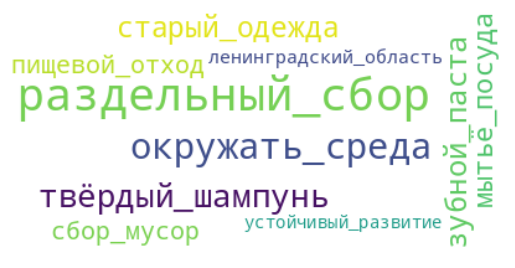

In [683]:
create_wordcloud(bert_initial, topic=0)

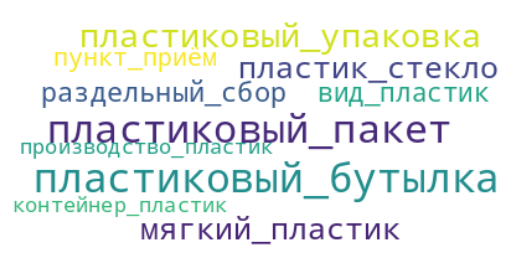

In [684]:
create_wordcloud(bert_initial, topic=1)

In [ ]:
create_wordcloud(bert_initial, topic=1)

In [ ]:
bert_initial_topics = bert_initial.get_topic_info()
bert_initial_topics.Name = +bert_initial_topics.Name.apply(split)
bert_initial_topics

In [ ]:
topics_show_bert([[25,2]],[bert_initial_topics], keywords=bert_initial_topics.Name)

In [ ]:
bert_initial.visualize_topics()

In [ ]:
bert_initial.visualize_heatmap()

<Axes: >

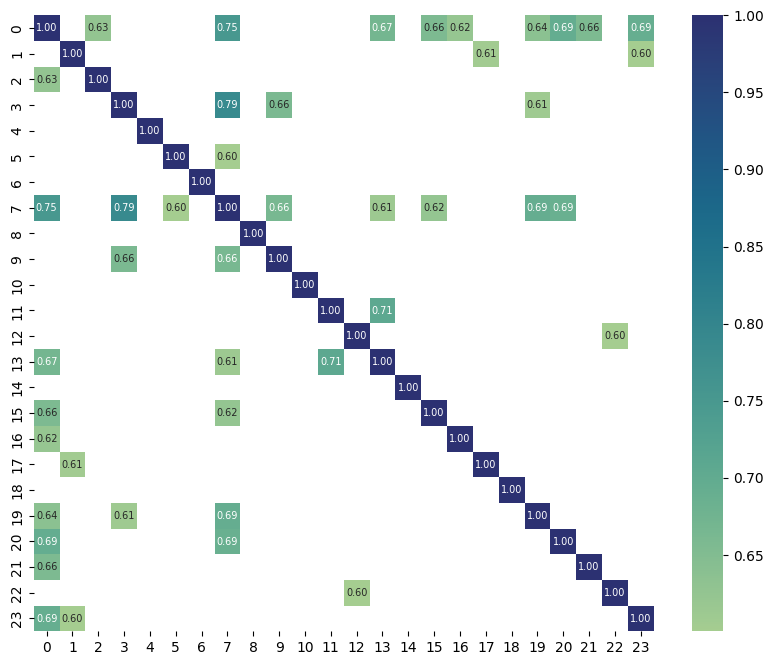

In [ ]:
plt.figure(figsize=(10,8))
matrix = bert_initial.visualize_heatmap().data[0].z
sns.heatmap(matrix, annot=True, mask=matrix<0.6, fmt=".2f", cmap="crest",
            annot_kws={"fontsize":7})

In [ ]:
bert_initial.visualize_barchart(top_n_topics=25)

In [ ]:
topic =-1
pd.DataFrame(bert_initial.get_topic(topic), columns = ['–¢–æ–ø–∏–∫–∏', '–ß–∞—Å—Ç–æ—Ç–∞']).set_index('–¢–æ–ø–∏–∫–∏')

–ß–∞—Å—Ç–æ—Ç–∞
–¢–æ–ø–∏–∫–∏                       
—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä      0.004192
–æ–∫—Ä—É–∂–∞—Ç—å_—Å—Ä–µ–¥–∞       0.002812
–ø–∏—â–µ–≤–æ–π_–æ—Ç—Ö–æ–¥        0.001785
–ø—É–Ω–∫—Ç_–ø—Ä–∏—ë–º          0.001516
—Ç–æ—á–∫–∞_–∑—Ä–µ–Ω–∏–µ         0.001458
–±—ã—Ç–æ–≤–æ–π_—Ö–∏–º–∏—è        0.001343
—Å–¥–∞—Ç—å_–ø–µ—Ä–µ—Ä–∞–±–æ—Ç–∫–∞    0.001237
–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π_–±—É—Ç—ã–ª–∫–∞  0.001192
–±–æ–ª—å—à–∏–π_—á–∞—Å—Ç—å        0.001116
—Å–±–æ—Ä_–º—É—Å–æ—Ä           0.001111

In [ ]:
docs_info= bert_initial.get_document_info(docs_df_all_2)
docs_topic = docs_info[docs_info.Topic == topic].sort_values(by='Probability', ascending=False)
ind = docs_topic.index

# print(topic, ' | '.join([word[0] for word in topic_dict[topic]][:5]))
messages = df_all.iloc[ind].query('length < 50').head(50).raw_text.values
pd.DataFrame(messages)
# for i, msg in enumerate(messages):
#   # print(re.sub('\s+',' ',msg)[:200])
#   print(i+1, break_string(re.sub('\s+',' ',msg), 100))
 # print()

In [ ]:
bert_topics_info =  pd.concat([
    df_all[['raw_text', 'source', 'text', 'text_space']].reset_index(drop=True),
    docs_info[['Topic', 'Probability']]
],axis=1,ignore_index=True)

In [ ]:
bert_topics_info.to_excel('bert_topics_info.xlsx')

In [ ]:
df_all[['raw_text', 'source', 'text', 'text_space']].reset_index(drop=True)

raw_text   
0      –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ –∂–∏–≤—ã–º —Ü–≤–µ—Ç–∞–º - –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–µ —Ü–≤–µ—Ç–æ—á...  \
1      –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ –∫ —Ü–≤–µ—Ç–∞–º - –≠–∫–æ —Å–≤–µ—á–∏ —Ä—É—á–Ω–æ–π —Ä–∞–±–æ—Ç...   
2      –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ —Ü–≤–µ—Ç–∞–º - —Å–ª–∞–¥–∫–∏–π –ø–æ–¥–∞—Ä–æ–∫-–æ—Ç–∫—Ä—ã—Ç–∫–∞...   
3      –°–≤–µ—á–∏ –∏–∑ –Ω–∞—Ç—É—Ä–∞–ª—å–Ω–æ–≥–æ —Å–æ–µ–≤–æ–≥–æ –≤–æ—Å–∫–∞ ‚ú®Ô∏è\n\n–ü–æ–¥–∞...   
4      –ú—ã–ª—å–Ω—ã–µ –Ω–∞–±–æ—Ä—ã —Å –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–º —Å–æ—Å—Ç–∞–≤–æ–º, –∞–ª–æ—ç –≤–µ...   
...                                                  ...   
19333  –í—ã –º–æ–∂–µ—Ç–µ –ø—Ä–∏—Å–æ–µ–¥–∏–Ω–∏—Ç—å—Å—è –∫ –¥—Ä—É–≥–∏–º –±–ª–∏–∑–ª–µ–∂–∞—â–∏—Ö ...   
19334  –î–æ–±—Ä—ã–π –≤–µ—á–µ—Ä! –ï—Å—Ç—å –ª–∏ —Ç—É—Ç –ª—é–¥–∏/–æ—Ç–¥–µ–ª—å–Ω—ã–π —á–∞—Ç –ø...   
19335  –í—Å–µ–º –ø—Ä–∏–≤–µ—Ç! –ú—ã —Å–æ–∑–¥–∞–ª–∏ —á–∞—Ç –µ–¥–∏–Ω–æ–º—ã—à–ª–µ–Ω–Ω–∏–∫–æ–≤ –≤...   
19336  ‚ôªÔ∏è–ì–†–£–ü–ü–´ –ü–û –†–ê–ô–û–ù–ê–ú!‚ôªÔ∏è\n----------------------...   
19337  ‚ôª –ü–†–ê–í–ò–õ–ê (–æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã –∫ –ø—Ä–æ—á—Ç–µ–Ω–∏—é) \n\n‚ôª –û–ë–Ø–ó...   

                      source   
0         vsemvermi_messages  \
1         vsemvermi_messages   
2         vsemvermi_messages   
3         vsemvermi_messages   
4         vsemvermi_messages   
...                      ...   
19333  tg_sobirator_messages   
19334  tg_sobirator_messages   
19335  tg_sobirator_messages   
19336  tg_sobirator_messages   
19337  tg_sobirator_messages   

                                                    text   
0      [–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞, –∂–∏–≤–æ–π, —Ü–≤–µ—Ç, –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π, —Ü–≤–µ—Ç–æ...  \
1      [–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞, —Ü–≤–µ—Ç, —Å–≤–µ—á–∞, —Ä—É—á–Ω–æ–π, —Ä–∞–±–æ—Ç–∞, –±–æ...   
2      [–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞, —Ü–≤–µ—Ç, —Å–ª–∞–¥–∫–∏–π, –ø–æ–¥–∞—Ä–æ–∫–æ—Ç–∫—Ä—ã—Ç–∫–∞,...   
3      [—Å–≤–µ—á–∞, –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π, —Å–æ–µ–≤—ã–π, –≤–æ—Å–∫, –ø–æ–¥–∞—Ä–æ—á–Ω—ã–π,...   
4      [–º—ã–ª—å–Ω—ã–π, –Ω–∞–±–æ—Ä, –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π, —Å–æ—Å—Ç–∞–≤, –∞–ª–æ—ç, –≤–µ...   
...                                                  ...   
19333  [–ø—Ä–∏—Å–æ–µ–¥–∏–Ω–∏—Ç—å—Å—è, –¥—Ä—É–≥–∏–º, –±–ª–∏–∑–ª–µ–∂–∞—â–∏—Ö, —Ä–∞–π–æ–Ω, —Å...   
19334  [–¥–æ–±—Ä—ã–π, –≤–µ—á–µ—Ä, –ª—é–¥–∏–æ—Ç–¥–µ–ª—å–Ω—ã–π, —á–∞—Ç, –ø–æ–ø—É—Ç—á–∏–∫, ...   
19335  [–ø—Ä–∏–≤–µ—Ç, —Å–æ–∑–¥–∞—Ç—å, —á–∞—Ç, –µ–¥–∏–Ω–æ–º—ã—à–ª–µ–Ω–Ω–∏–∫, –≤–æ–ª–æ–Ω—Ç—ë...   
19336  [–≥—Ä—É–ø–ø–∞, —Ä–∞–π–æ–Ω, –æ–±—Å—É–∂–¥–µ–Ω–∏–µ, —Å–≤—è–∑–∞—Ç—å, –ø–æ–ø—É—Ç—á–∏–∫,...   
19337  [–ø—Ä–∞–≤–∏–ª–æ, –æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã–π, –ø—Ä–æ—á—Ç–µ–Ω–∏–µ, –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ...   

                                              text_space  
0      –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ –∂–∏–≤–æ–π —Ü–≤–µ—Ç –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π —Ü–≤–µ—Ç–æ—á–Ω—ã–π ...  
1      –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ —Ü–≤–µ—Ç —Å–≤–µ—á–∞ —Ä—É—á–Ω–æ–π —Ä–∞–±–æ—Ç–∞ –±–æ–∂–µ—Å—Ç–≤–µ...  
2      –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ —Ü–≤–µ—Ç —Å–ª–∞–¥–∫–∏–π –ø–æ–¥–∞—Ä–æ–∫–æ—Ç–∫—Ä—ã—Ç–∫–∞ –±–µ–Ω—Ç...  
3      —Å–≤–µ—á–∞ –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π —Å–æ–µ–≤—ã–π –≤–æ—Å–∫ –ø–æ–¥–∞—Ä–æ—á–Ω—ã–π –æ—Ñ–æ—Ä–º...  
4      –º—ã–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–π —Å–æ—Å—Ç–∞–≤ –∞–ª–æ—ç –≤–µ—Ä–∞ —É–≤–ª...  
...                                                  ...  
19333  –ø—Ä–∏—Å–æ–µ–¥–∏–Ω–∏—Ç—å—Å—è –¥—Ä—É–≥–∏–º –±–ª–∏–∑–ª–µ–∂–∞—â–∏—Ö —Ä–∞–π–æ–Ω —Å–æ–∑–¥–∞—Ç...  
19334  –¥–æ–±—Ä—ã–π –≤–µ—á–µ—Ä –ª—é–¥–∏–æ—Ç–¥–µ–ª—å–Ω—ã–π —á–∞—Ç –ø–æ–ø—É—Ç—á–∏–∫ –º—Ç—Ä–µ—Ç—å...  
19335  –ø—Ä–∏–≤–µ—Ç —Å–æ–∑–¥–∞—Ç—å —á–∞—Ç –µ–¥–∏–Ω–æ–º—ã—à–ª–µ–Ω–Ω–∏–∫ –≤–æ–ª–æ–Ω—Ç—ë—Ä –ø—Ä–æ...  
19336  –≥—Ä—É–ø–ø–∞ —Ä–∞–π–æ–Ω –æ–±—Å—É–∂–¥–µ–Ω–∏–µ —Å–≤—è–∑–∞—Ç—å –ø–æ–ø—É—Ç—á–∏–∫ –º–∞—Ä—å–∏...  
19337  –ø—Ä–∞–≤–∏–ª–æ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã–π –ø—Ä–æ—á—Ç–µ–Ω–∏–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø—Ä–æ...  

[19338 rows x 4 columns]

In [ ]:
df_all.shape

(19338, 8)

# –∞–Ω–∞–ª–∏–∑ –±–æ–ª—å—à–∏—Ö —Ç–æ–ø–∏–∫–æ–≤

In [ ]:
topic = 0
docs_info= bert_initial.get_document_info(docs_df_all_2)
docs_topic = docs_info[docs_info.Topic == topic].sort_values(by='Probability', ascending=False)
ind = docs_topic.index
messages_of_topic = df_all.iloc[ind]

In [ ]:
bert_0 = BERTopic(language="multilingual", calculate_probabilities=True,
                       verbose=True, 
                        nr_topics=25,
                       vectorizer_model=CountVectorizer(ngram_range=(1, 1))
                       )
docs_topic = messages_of_topic['2_grams_space'].to_list()
bert_topics_initial, bert_probs_initial = bert_0.fit_transform(docs_topic)
coherence = get_coherence_bert(bert_0, docs_topic)
coherence

Batches:   0%|          | 0/316 [00:00<?, ?it/s]

2023-05-29 07:27:44,672 - BERTopic - Transformed documents to Embeddings
2023-05-29 07:27:57,756 - BERTopic - Reduced dimensionality
2023-05-29 07:28:02,147 - BERTopic - Clustered reduced embeddings
2023-05-29 07:28:05,728 - BERTopic - Reduced number of topics from 94 to 25


0.31587091956568164

In [ ]:
bert_0.visualize_barchart(top_n_topics=25)

In [ ]:
topic = 1
docs_info= bert_initial.get_document_info(docs_df_all_2)
docs_topic = docs_info[docs_info.Topic == topic].sort_values(by='Probability', ascending=False)
ind = docs_topic.index
messages_of_topic = df_all.iloc[ind]
bert_1 = BERTopic(language="multilingual", calculate_probabilities=True,
                       verbose=True, 
                        nr_topics=25,
                       vectorizer_model=CountVectorizer(ngram_range=(1, 1))
                       )
docs_topic = messages_of_topic['2_grams_space'].to_list()
bert_topics_initial, bert_probs_initial = bert_1.fit_transform(docs_topic)
coherence = get_coherence_bert(bert_1, docs_topic)
coherence

Batches:   0%|          | 0/40 [00:00<?, ?it/s]

2023-05-29 07:28:27,148 - BERTopic - Transformed documents to Embeddings
2023-05-29 07:28:32,269 - BERTopic - Reduced dimensionality
2023-05-29 07:28:32,355 - BERTopic - Clustered reduced embeddings
2023-05-29 07:28:32,590 - BERTopic - Reduced number of topics from 14 to 14


0.3918943767679153

In [ ]:
bert_1.visualize_barchart(top_n_topics=25)

In [ ]:
bert_topics_0 = bert_0.get_topic_info()
bert_topics_0.Name = bert_topics_0.Name.apply(split)
bert_topics_0

Topic  Count                                               Name
0      -1   7042  —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π —Å–±–æ—Ä | –æ–∫—Ä—É–∂–∞—Ç—å —Å—Ä–µ–¥–∞ | –ø–∏—â–µ–≤–æ–π –æ—Ç—Ö...
1       0   1384  —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π —Å–±–æ—Ä | –æ–∫—Ä—É–∂–∞—Ç—å —Å—Ä–µ–¥–∞ | –Ω–æ–ª—å –æ—Ç—Ö–æ–¥ ...
2       1    333  –ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π –ø–∞–∫–µ—Ç | –±—É–º–∞–∂–Ω—ã–π –ø–∞–∫–µ—Ç | –ø–ª–∞—Å—Ç–∏–∫–æ–≤...
3       2    308  –æ–∫—Ä—É–∂–∞—Ç—å —Å—Ä–µ–¥–∞ | —É—Å—Ç–æ–π—á–∏–≤—ã–π —Ä–∞–∑–≤–∏—Ç–∏–µ | —ç–∫–æ–ª–æ–≥–∏...
4       3    232  –ª–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∏–π –æ–±–ª–∞—Å—Ç—å | —Ñ–∏–Ω—Å–∫–∏–π –∑–∞–ª–∏–≤ | –Ω–µ–≤—Å–∫–∏...
5       4    121  —á–∞–π–Ω—ã–π –ª–æ–∂–∫–∞ | —Å—Ç–æ–ª–æ–≤—ã–π –ª–æ–∂–∫–∞ | –≤–æ—Å–∫–æ–≤–æ–π —Å–∞–ª—Ñ–µ...
6       5     79  —á–∞—Å –∑–µ–º–ª—è | –æ–∫—Ä—É–∂–∞—Ç—å —Å—Ä–µ–¥–∞ | –¥–∏–∫–∏–π –ø—Ä–∏—Ä–æ–¥–∞ | –ø...
7       6     72  –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–π –æ—Ç—Ö–æ–¥ | –ø–∏—â–µ–≤–æ–π –æ—Ç—Ö–æ–¥ | –º—É—Å–æ—Ä–Ω—ã–π ...
8       7     59  –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä–Ω—ã–π –ø–ª–æ—â–∞–¥–∫–∞ | –Ω–æ–≤—ã–π –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä | —Ä–∞–∑–¥...
9       8     51  —Å–æ–ª–Ω–µ—á–Ω—ã–π –±–∞—Ç–∞—Ä–µ—è | —Å–æ–ª–Ω–µ—á–Ω—ã–π –ø–∞–Ω–µ–ª—å | –¥–æ–±—ã—á–∞ ...
10      9     50  –±—ã—Ç–æ–≤–æ–π —Ö–∏–º–∏—è | –≤—Ä–µ–¥ —ç–∫–æ–ª–æ–≥–∏—è | —Ç—è–∂—ë–ª—ã–π –º–µ—Ç–∞–ª–ª...
11     10     47  –∫–∞—á–µ—Å—Ç–≤–æ –≤–æ–∑–¥—É—Ö | –≥–æ—Ä–æ–¥ –∫–∞—á–µ—Å—Ç–≤–æ | –º–µ—Å—Ç–Ω—ã–π –∂–∏—Ç...
12     11     41  –±–ª–∞–≥–æ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –ø—Ä–æ–µ–∫—Ç | –æ—Ñ–æ—Ä–º–∏—Ç—å –µ–∂–µ–º–µ—Å—è—á–Ω—ã...
13     12     37  —á–∞—Å—Ç–∏—á–∫–∞ –ø—ã–ª—å | —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –ø–ª–∏—Ç–∫–∞ | –ø—ã–ª—å –≤–æ...
14     13     37  –∫–æ–º–∏—Ç–µ—Ç –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ | –∫–æ–º–∏—Ç–µ—Ç —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç | ...
15     14     33  –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–∞—à–∏–Ω–∞ | –¥–∞—á–∞ –∑–∏–º–∞ | –∑–∏–º–∞ –µ–∑–¥–∏—Ç—å ...
16     15     31  —Ä—É–±–ª—å —Ä—É–±–ª—å | –º–æ—Ä–∫–æ–≤—å —Å–≤—ë–∫–ª–∞ | –ª —Ä—É–±–ª—å | –∫–Ω—è–∑—å...
17     16     28  –∑–µ–ª—ë–Ω—ã–π –æ–±–ª–∏–≥–∞—Ü–∏—è | –æ–∫—Ä—É–∂–∞—Ç—å —Å—Ä–µ–¥–∞ | –∑–µ–ª—ë–Ω—ã–π –ø...
18     17     17  –æ—Ñ–∏—Å–Ω—ã–π –∑–¥–∞–Ω–∏–µ | –ª–∞–Ω–¥—à–∞—Ñ—Ç–Ω—ã–π –¥–∏–∑–∞–π–Ω–µ—Ä | —Ñ–æ—Ä–º–∞ ...
19     18     17  –Ω–∏–∂–Ω–∏–π –±–µ–ª—å—ë | –≤–ª–∞–∂–Ω—ã–π —Å–∞–ª—Ñ–µ—Ç–∫–∞ | –∞–∫–∫—É—Ä–∞—Ç–Ω–æ –≤–∑...
20     19     15  —ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–∞ | —Å–ª–æ–π –ø–µ—Å–æ–∫ | —é–∂–Ω—ã–π ...
21     20     14  –±–∞–º–±—É–∫–æ–≤—ã–π —â—ë—Ç–∫–∞ | –ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–π —â—ë—Ç–∫–∞ | —â—ë—Ç–∫–∞ –ø...
22     21     14  —á–∏—Å—Ç—ã–π –∏–≥—Ä–∞ | –∏–≥—Ä–∞ –∫–æ–º–∞–Ω–¥–Ω—ã–π | –∫–æ–º–∞–Ω–¥–Ω—ã–π —Å–æ—Ä–µ–≤...
23     22     12  –±—ã—Å—Ç—Ä—ã–π —É–≥–ª–µ–≤–æ–¥ | –æ—Ä–≥–∞–Ω–∏–∑–º —Ö–æ—Ä–æ—à–∏–π | —Å—ã—Ä–æ–π –æ–≤–æ...
24     23     11  —Ä–µ—Å—É—Ä—Å –∫–∫–∫ | –∫–∫–∫ –ø–æ—Ç—Ä–µ–±–ª—è—Ç—å | –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —Ä–µ—Å—É...

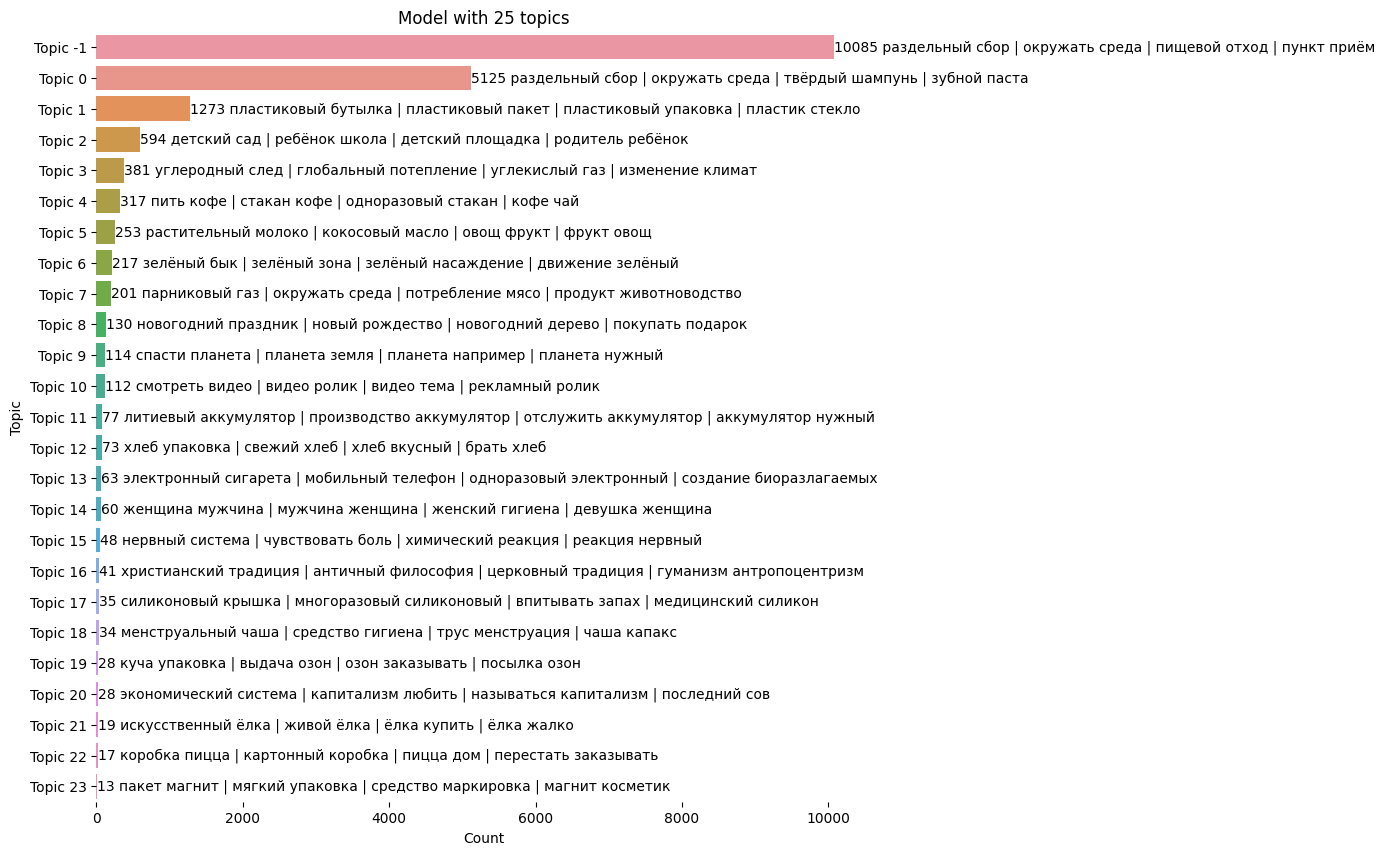

In [ ]:
topics_show_bert([[25,2]],[bert_initial_topics], keywords=bert_initial_topics.Name)

In [ ]:
topic = -1
docs_info= bert_initial.get_document_info(docs_df_all_2)
docs_topic = docs_info[docs_info.Topic == topic].sort_values(by='Probability', ascending=False)
ind = docs_topic.index
messages_of_topic = df_all.iloc[ind]

bert_min_1 = BERTopic(language="multilingual", calculate_probabilities=True,
                       verbose=True, 
                        nr_topics='auto',
                       vectorizer_model=CountVectorizer(ngram_range=(1, 1))
                       )
docs_topic = messages_of_topic['2_grams_space'].to_list()
bert_topics_initial, bert_probs_initial = bert_min_1.fit_transform(docs_topic)
coherence = get_coherence_bert(bert_min_1, docs_topic)
coherence

Batches:   0%|          | 0/316 [00:00<?, ?it/s]

2023-05-29 07:19:11,686 - BERTopic - Transformed documents to Embeddings
2023-05-29 07:19:19,351 - BERTopic - Reduced dimensionality
2023-05-29 07:19:20,397 - BERTopic - Clustered reduced embeddings
2023-05-29 07:19:23,425 - BERTopic - Reduced number of topics from 3 to 3


0.28352932890291715

In [ ]:
bert_topics_initial

In [ ]:
bert_min_1.visualize_barchart(top_n_topics=25)

In [ ]:
bert_min_1.get_topic_info()

Topic  Count                                               Name
0     -1    477  -1_—ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π_–ø—Ä–æ–±–ª–µ–º–∞_—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_–æ–∫—Ä—É...
1      0   9595  0_—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π_—Å–±–æ—Ä_–æ–∫—Ä—É–∂–∞—Ç—å_—Å—Ä–µ–¥–∞_–ø–∏—â–µ–≤–æ–π_–æ—Ç—Ö–æ–¥...
2      1     13  1_—á–∏—Å—Ç—ã–π_–∏–≥—Ä–∞_—É—á–∞—Å—Ç–∏–µ_–∏–≥—Ä–∞_–∏–≥—Ä–∞—Ç—å_–∏–≥—Ä–∞_–±–µ—Å–ø–ª–∞—Ç...

# 

# Setiment analysis

In [ ]:
topic_sent = pd.read_excel('topics_sentiment.xlsx')
topic_sent.text = topic_sent.text.apply(lambda x: str_to_list(x))
topic_sent.rename(columns={'Max_Column': 'sentiment'}, inplace=True)
topic_sent

In [582]:
topic_pos = topic_sent[(topic_sent.sentiment=='positive')]
topic_neg = topic_sent[(topic_sent.sentiment=='negative')]
topic_pos.shape, topic_neg.shape

((794, 12), (3313, 12))

In [ ]:
plt.figure(figsize=(4,3))
gg = topic_sent.sentiment.value_counts().reset_index()
ax = sns.barplot(gg ,x='count',y='sentiment', orient='h',)
ax.bar_label(ax.containers[0])
ax.set_frame_on(False)
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title(f'Distribution of sentiment in whole dataset')
plt.show()

In [641]:
cvect_1_pos, cmatrix_1_pos = vectorizer(topic_sent.query('sentiment == "positive"'), ngram_range=(1,1),min_df=0, mode='c')
cvect_2_pos, cmatrix_2_pos = vectorizer(topic_sent.query('sentiment == "positive"'), ngram_range=(2,2),min_df=0, mode='c')
cvect_1_neg, cmatrix_1_neg = vectorizer(topic_sent.query('sentiment == "negative"'), ngram_range=(1,1),min_df=0, mode='c')
cvect_2_neg, cmatrix_2_neg = vectorizer(topic_sent.query('sentiment == "negative"'), ngram_range=(2,2),min_df=0, mode='c')

In [ ]:
freq_vis(cmatrix_1_pos)

In [ ]:
freq_vis(cmatrix_1_neg)

In [ ]:
freq_vis(cmatrix_2_pos)

In [613]:
def dist_sent(topic):
  plt.figure(figsize=(4,3))
  topic_sent_un = topic_sent[topic_sent.topic == topic]
  gg = topic_sent_un.sentiment.value_counts().reset_index()
  ax = sns.barplot(gg ,x='count',y='sentiment', orient='h',)
  ax.bar_label(ax.containers[0])
  ax.set_frame_on(False)
  plt.xlabel('Count')
  plt.ylabel('Sentiment')
  plt.title(f'Distribution of sentiment in topic {topic}')
  plt.show()
  

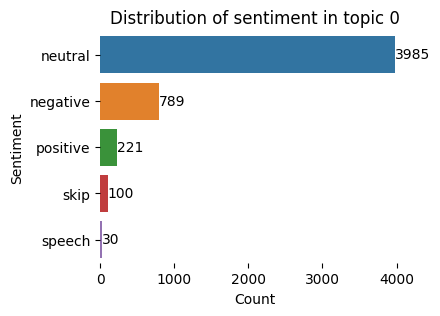

In [677]:
dist_sent(0)

In [668]:
topic = 0

In [ ]:
topic_sent_un = topic_sent[topic_sent.topic == topic]

messages = topic_sent_un.query('sentiment == "positive"').sort_values(by='positive', ascending=False).raw_text.values
pd.DataFrame(messages)

In [673]:
topic_sent_un = topic_sent[topic_sent.topic == topic]
messages = topic_sent_un.query('sentiment == "neutral"').sort_values(by='neutral', ascending=False).raw_text.values[:50]
pd.DataFrame(messages)

0
0   [id204864863|–¢–∏–∫–∏], –ø–æ—Å—á–∏—Ç–∞—Ç—å "—É–¥–∞—Ä–Ω–æ—Å—Ç—å" –¥–æ–∑—ã...
1   –ü–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏ –ø–æ—è–≤–ª—è—é—Ç—Å—è –º–Ω–æ–≥–æ –∫–∞—Ä—Ç—Ä–∏–¥–∂–µ–π –æ—Ç –ø—Ä...
2   –ü—Ä–æ—à–ª–∞ –ø–æ —Å—Å—ã–ª–∫–µ, –∞–≤—Ç–æ—Ä–∏–∑–æ–≤–∞–ª–∏—Å—å —á–µ—Ä–µ–∑ –ï–°–ò–ê, –∞...
3   –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ, –≥–¥–µ –º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –≤—ã–ø—É—Å–∫–Ω–∏–∫ –Ω–∞–ø—Ä–∞...
4   –ß—Ç–æ, –≤—ã–±—Ä–∞—Å—ã–≤–∞–Ω–∏–µ –º—É—Å–æ—Ä–∞? –†–µ–≥—É–ª–∏—Ä—É–µ—Ç—Å—è. –ú–æ–∂–µ—Ç–µ...
5   –£–≤–∞–∂–∞–µ–º—ã–µ –∫–æ–ª–ª–µ–≥–∏! –í–æ–ø—Ä–æ—Å—ã –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö —Ç—Ä–µ–±...
6   –§–æ—Ä–º–∞—Ç —Ñ–æ—Ä—É–º–∞ - –æ–Ω–ª–∞–π–Ω –≤ ZOOM, —É –≤–∞—Å –±—É–¥–µ—Ç –≤–æ–∑...
7   –≠—Ç–∞ –∞–∫—Ü–∏—è —É—á–∏—Ç—ã–≤–∞–µ—Ç –ø—Ä–∏–Ω—Ü–∏–ø Repair&Reuse?  –ù–∞ ...
8   –ó–∞—Ö–æ–¥–∏—Ç–µ –∏ –≥–æ–ª–æ—Å—É–π—Ç–µ –Ω–∞ —Å–∞–π—Ç–µ –†–æ—Å—Å–∏–π—Å–∫–∏—Ö –æ–±—â–µ—Å...
9   –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ, –º—É—Å–æ—Ä –∫–æ—Ç–æ—Ä—ã–π –º—ã "—Å–æ—Ä—Ç–∏—Ä—É–µ–º" –≤—ã–±—Ä–∞...
10  –¢–∞–º 25 –≤–æ–ø—Ä–æ—Å–æ–≤ –ø–æ 12 —Ç–µ–º–∞–º –≤ —ç—Ç–æ–º –≥–æ–¥—É. –ò –µ—â—ë...
11  –í –∫–Ω–∏–∂–Ω–æ–º –º–∞–≥–∞–∑–∏–Ω—á–∏–∫–µ –ë—É–º–∞–∂–Ω—ã–π –∑–º–µ–π –ø–æ –∞–¥—Ä–µ—Å—É ...
12  —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É–π—Ç–µ –ø–æ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —Ç–µ—Ö–Ω–∏–∫—É, —á—Ç–æ–± –Ω–æ...
13  –°–û–¶–°–ï–¢–ò, –ö–£–î–ê –ú–û–ñ–ù–û –ù–ê–ü–ò–°–ê–¢–¨ –û –ü–†–û–ò–°–•–û–î–Ø–©–ï–ú –ò ...
14  –°–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ —Å–æ–∑–¥–∞–µ—Ç –ª–∏ –æ–Ω —ç—Ñ—Ñ–µ–∫—Ç –≥—Ä—è–∑–Ω—ã...
15  1) –ù–µ–±–æ–ª—å—à–∞—è —Å—Ç–∞—Ç—å—è: https://www.rospotrebnadz...
16  –°—Å—ã–ª–∫—É –Ω–∞ –ø–µ—Ç–∏—Ü–∏—é –Ω—É–∂–Ω–æ –±—ã–ª–æ –≤—ã–Ω–µ—Å—Ç–∏ —Å—Ä–∞–∑—É –≤–æ ...
17  –ò–∑–º–µ–Ω–∏–ª–∏—Å—å –ø—Ä–∞–≤–∏–ª–∞ –ø—Ä–∏—ë–º–∞ –æ–±—Ä–∞—â–µ–Ω–∏–π. –ù–∞ —Å–∞–π—Ç–µ ...
18  –ß–µ–ª–æ–≤–µ–∫,  —ç—Ç–æ –Ω–∞–ø–∏—Å–∞–≤—à–∏–π,  –Ω–µ —É–º–µ–µ—Ç —è–≤–Ω–æ –ø–æ–ª—å–∑...
19  –ö–∞–∫ –ø–æ–¥–∞—Ç—å –∑–∞—è–≤–∫—É –Ω–∞ —É—á–∞—Å—Ç–∏–µ –≤ —Å–±–æ—Ä–µ –æ—Ä–≥–∞–Ω–∏–∫–∏ ...
20  [id1628297|–¢–∞—Ç—å—è–Ω–∞], –Ω–∞ –±—É–ª—å–≤–∞—Ä–µ –ù–æ–≤–∞—Ç–æ—Ä–æ–≤, 32...
21  –°—Å—ã–ª–∫—É –ø–æ–º–µ–Ω—è–ª–∏, —Ç–∞–∫ –∫–∞–∫ —Å–ø–∞–º –Ω–∞—á–∞–ª—Å—è. –î–∞–≤–∞–π—Ç–µ...
22  –ù–∞ –∞–∫—Ü–∏—è—Ö –±—ã–≤–∞—é —Ä–∞–∑ –≤ –≥–æ–¥. –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ, –∫—É–¥–∞ —Ç–µ...
23  [club122829277|Zero Waste –≤ —Ç–µ–æ—Ä–∏–∏ –∏ –Ω–∞ –ø—Ä–∞–∫—Ç–∏...
24  –¢–æ–∂–µ –≤–æ–ø—Ä–æ—Å –Ω–µ —Å–æ–≤—Å–µ–º –≤ —Ç–µ–º—É:) –ö—Ç–æ-–Ω–∏–±—É–¥—å –º–æ–∂–µ...
25  –†–µ–∞–≥–µ–Ω—Ç—ã –∏ –ª–∞–ø—ã –ø–æ—Ä—Ç—è—Ç —Å–æ–±–∞–∫–∞–º. –ò –æ–±—É–≤—å –ª—é–¥—è–º....
26  –î–ª—è —á–µ–ª–æ–≤–µ–∫–∞ –∫–æ—Ç–æ—Ä—ã–π –≤–æ–æ–±—â–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –≤ —Ç...
27  –¢–µ–∫—Å—Ç –ø–∏—Å—å–º–∞ –Ω—É–∂–Ω–æ —Ä–∞—Å–ø–µ—á–∞—Ç–∞—Ç—å, –ø–æ–¥–ø–∏—Å–∞—Ç—å –∂–∏–≤–æ...
28  https://vk.com/vegancatsanddogs –ì—Ä—É–ø–ø–∞ "–∫–æ—à–∫–∏-...
29  –£ –º–µ–Ω—è –∫ –≤–∞–º –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ, –º–æ–∂–µ—Ç –≤ –±—É–¥—É—â–µ–º —Å–¥–µ–ª...
30  –Ø –ø—Ä–æ—à–ª–∞ –æ–ø—Ä–æ—Å –¥–æ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≤–æ–ø—Ä–æ—Å–∞ –≤–∫–ª—é—á–∏—Ç–µ–ª...
31  –ü–æ—á–µ–º—É —Ç–∞–∫–æ–µ –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ - –≤ –ø–æ—Å—Ç–µ –∂–∏—Ç–µ–ª—å –ö...
32  –ï—Å—Ç—å —É –∫–æ–≥–æ-–Ω–∏–±—É–¥—å —á–µ—Ä–≤—è—á–∫–∏ –¥–ª—è –≤–µ—Ä–º–∏–∫–æ–º–ø–æ—Å—Ç–∞?...
33  –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è 792 –ª–∏—Ç—Ä–æ–≤ –≤–æ–¥—ã, —á—Ç–æ–±—ã —Å...
34  –ü–æ–¥–ø–∏—à–∏—Ç–µ –ü–ï–¢–ò–¶–ò–ò, –ü–æ–¥–¥–µ—Ä–∂–∏—Ç–µ –≤–∞—Å–∏–ª–µ–æ—Å—Ç—Ä–æ–≤—Ü–µ–≤ ...
35  –ù–∞ —É–ª. –£—à–∏–Ω—Å–∫–æ–≥–æ –º–æ–∂–Ω–æ –±–µ—Å–ø–ª–∞—Ç–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å –Ω–∞ –ø...
36  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é ...
37  "–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –í–∞–º –æ—Ç–≤–µ—á–∞—é—Ç –∏–∑ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏–∏ –í...
38  –î—Ä—É–∑—å—è, –Ω–µ –Ω–∞—Ä—É—à–∞–π—Ç–µ –ø—Ä–∞–≤–∏–ª–∞ —á–∞—Ç–∞, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞!...
39  –ö–æ–º–∏—Ç–µ—Ç –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏ –ø–æ –æ–±—Ä–∞—â–µ–Ω–∏—é —Å –æ...
40  –í—Å—ë –ø–µ—Ä–µ—á–∏—Å–ª–µ–Ω–Ω–æ–µ —è–≤–ª—è–µ—Ç—Å—è –ø–µ—Ä–µ—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º—ã–º–∏ –æ...
41  https://www.roi.ru/76545/ –î–µ–ø—É—Ç–∞—Ç—ã —Å–æ–±–∏—Ä–∞—é—Ç—Å—è ...
42  –ï—Å—Ç—å –∫—Ç–æ-—Ç–æ –∏–∑ –î–æ–º–æ–¥–µ–¥–æ–≤–æ, –∫—Ç–æ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª...
43  –†–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è–µ—Ç—Å—è —Å–µ–º–µ–Ω–∞–º–∏. –û—Ç –∫–æ—Ä–Ω–µ–π –º–æ–∂–µ—Ç –≤—ã—Ä...
44  –ö–∞–∫ —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å?\n–û—Ç–ø—Ä–∞–≤–∏—Ç—å –æ–±—Ä–∞—â

In [676]:
topic_sent_un = topic_sent[topic_sent.topic == topic]
messages = topic_sent_un.query('sentiment == "negative"').head(50).sort_values(by='negative', ascending=False).raw_text.values
pd.DataFrame(messages)

0
0   –ê –ø–æ-–º–æ–µ–º—É –ø—Ä–æ—Å—Ç–æ —Å–ª–∏—à–∫–æ–º —É–∂ –º–Ω–æ–≥–æ –ø–æ—Ñ–∏–≥–∏—Å—Ç–æ–≤ ...
1   –î–ª—è –º–µ–Ω—è –Ω–æ—Å–∏—Ç—å –º–Ω–æ–≥–æ—Ä–∞–∑–æ–≤—É—é –±—É—Ç—ã–ª–∫—É, —Ç–µ—Ä–º–æ–∫—Ä—É...
2   [id25909604|–¢–∞—Ç—å—è–Ω–∞], —É –º–µ–Ω—è —Ç–æ–∂–µ –∫–æ—à–∫–∞ —Å —É–¥–æ–≤...
3   –ê —É –Ω–∞—Å –≤ –≥–æ—Ä–æ–¥–µ,–≤ –º–æ—ë–º —Ä–∞–π–æ–Ω–µ, –Ω–µ—Ç –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä–æ...
4   [id423076402|–ü–∞–≤–µ–ª], —Ç—É—Ç –í—ã –∞–±—Å–æ–ª—é—Ç–Ω–æ –ø—Ä–∞–≤—ã. –¢...
5   [id186741626|Julia], –ª–µ–≥—á–µ —Å–¥–æ—Ö–Ω—É—Ç—å, —á—Ç–æ–±—ã –≤–æ–æ...
6   –≠—Ç–æ –µ—â—ë –≤–µ—Å—å–º–∞ –ª–æ—è–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã –º...
7   –í—Å—ë!!!! –ë–æ–ª—å—à–µ –Ω–µ –º–æ–≥—É –∫–æ–ø–∏—Ç—å –≤ –º–æ—Ä–æ–∑–∏–ª–∫–µ –æ—Ä–≥–∞...
8   –ù–µ –ø–æ–Ω–∏–º–∞—é, –≤ —á–µ–º –Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–∞. –ß–µ–ª–æ–≤–µ–∫ –ø–æ–ø—ã—Ç–∞...
9   –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –ê –µ—Å–ª–∏ –µ–µ –Ω–µ –º—ã—Ç—å –∏ –ø—Ä–æ—Å—Ç–æ –æ—Å—Ç–∞–≤–∏...
10  [id181242|–í–µ—Ä–æ–Ω–∏–∫–∞], –≥–∞ –º—ã—Å–ª—å –∏—Ö —ç—Ç–æ –≤—Ä–µ–¥ –ª–∏ –Ω...
11  –ò–Ω–æ–≥–¥–∞ –≤–≤–æ–¥–∏—Ç –≤ —Å—Ç—É–ø–æ—Ä —Ç–æ, –∫–∞–∫ –ª—é–¥–∏ —Å –ø–æ–º–æ—â—å—é ...
12  [id303058104|–ü—É—Å—Ç–æ—à—å], –í–∞—Å –∫—Ä–∏—Ç–∏–∫—É—é—Ç –∫–∞–∫ —Ä–∞–∑ –Ω...
13  [id6273622|–û–ª—å–≥–∞], –¥–æ–º–∞-—Ç–æ –æ–Ω –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –∏ –≤...
14  –ù–∏–∫–∞–∫–∏—Ö –ø—Ä–æ–±–ª–µ–º –ø–æ –ø–æ–≤–æ–¥—É —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–æ–º–∞—à–Ω–µ–≥–æ...
15  –ù–æ –Ω–∞–º –ø–æ–∫–∞ –Ω–µ –≤—ã–∫–∏–¥—ã–≤–∞—Ç—å?:( –∫–∞–∫ —Ä–∞–∑ –Ω–∞–∫–æ–ø–∏–ª–∏ ...
16  –≠—Ç–æ, –∫–æ–Ω–µ—á–Ω–æ, –∑–¥–æ—Ä–æ–≤–æ, –Ω–æ —Å–∞–º–∞ –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –∫—Ä–µ–º–∞...
17  –î–ª—è –Ω–∞—Å —ç—Ç–æ –Ω–µ—Ä–µ–∞–ª—å–Ω–æ—Å—Ç—å....—Å—Ç–æ–ª—å–∫–æ —É–ø–∞–∫–æ–≤–∫–∏ –ø...
18  –ú–Ω–µ –µ—â—ë –Ω–µ –≤—Å—Ç—Ä–µ—á–∞–ª–∏—Å—å –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –Ω–∞—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –ø...
19  –°—Ç–∞—Ç—å—è –æ—Ç–ª–∏—á–Ω–∞—è... –ê –∫–∞—á–µ—Å—Ç–≤–æ —Ñ–æ—Ç–æ –Ω–∞ —Å—Ç–æ–ª—å–∫–æ ...
20  –Ø –ø–æ—Å–ª–∞–ª–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–∏—Å–µ–º –Ω–∞—Å—á–µ—Ç –Ω–µ –ø–µ—Ä–µ—Ä–∞–±–∞—Ç—ã...
21  –ù–µ–≤–µ–≥–∞–Ω–∫–∏: –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—Ç —É–±–∏–π—Å—Ç–≤–∞ –∏ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏...
22  [id70078792|Annet], –Ω–∞—à–∏ –ø—Ä–µ–¥–∫–∏ –Ω–µ –∑–∞–≥—Ä—è–∑–Ω—è–ª–∏ ...
23  [id415288093|–ö–∞—Ä—Ç–æ—à–µ—á–∫–∞], —Ç—ã –ø–∏—Å–∞–ª–∞ –º–∞–Ω—Ç—Ä—É, –∞ ...
24  [id78707785|–ù–∞—Ç–∞–ª—å—è], –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–æ. –ë—ã–ª–∏ –±—ã –ø—É...
25  –ê –≤ –º–æ–µ–π –¥–µ—Ä–µ–≤–Ω–µ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –ª—é–¥–∏ –ø—Ä–∏—Ö–æ–¥—è—Ç –Ω–∞ —Å...
26  –í —Å–ª—É—á–∞–µ —Å —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–æ–π –º—É—Å–æ—Ä–∞ –º–Ω–µ –≥–æ–≤–æ—Ä—è—Ç "—Ç—ã ...
27  –°–æ–≥–ª–∞—Å–Ω–∞ —Ä–∞–∑–¥–µ–ª—è—Ç—å...–ø—É—Å—Ç—å –æ—Ä–≥–∞–Ω–∏–∑–æ–≤—ã–≤–∞—é—Ç –¥–æ—Å—Ç...
28  [id409776889|–ï–ª–µ–Ω–∞], –≤–∞—Ç–Ω—ã–µ –ø–∞–ª–æ—á–∫–∏ –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á...
29  –õ—é–¥–∏ –ø–æ–±–µ–¥–Ω–µ–µ –≤—Å–µ–≥–¥–∞ –ø—ã—Ç–∞–ª–∏—Å—å —ç–∫–æ–Ω–æ–º–∏—Ç—å –∏ —Å—É–º–∫...
30  –≤—á–µ—Ä–∞ –º–Ω–µ –≤ –∫–∞–Ω—Ü–µ–ª—è—Ä—Å–∫–æ–º –º–∞–≥–∞–∑–∏–Ω–µ –ø—ã—Ç–∞–ª–∏—Å—å –¥–≤–∞...
31  [id423076402|–ü–∞–≤–µ–ª], —Ö–ª–æ–ø–∫–æ–≤—ã–µ –±–æ—Ç–∏–Ω–∫–∏, —É–≥–≥–∏ –∏...
32  –¢–∞–∫ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª–∏ —Å—Ç–∞–ª–∏ –¥–µ–ª–∞—Ç—å –æ–¥–µ–∂–¥—É –∏–∑ —Ç—É–∞–ª–µ...
33  [id88644013|–û–ª—å–≥–∞], —Ç—Ä—É—Å–∏–∫–∏ —Ä–µ—à–∞—é—Ç –ø—Ä–æ–±–ª–µ–º—É –ø—Ä...
34  [id300243004|–ù–∞—Ç–∞–ª—å—è], –Ω–µ—Ç, –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é, –Ω–µ –Ω—Ä...
35  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ê –∫—Ç–æ-–Ω–∏–±—É–¥—å –ø–æ–µ–¥–µ—Ç –Ω–∞ –∞–∫—Ü–∏—é –∏–∑ ...
36  8 –ø—É–Ω–∫—Ç. –ì–∞–∑–µ—Ç—É? –≠—Ç–æ –ø—Ä–æ—Å—Ç–æ –Ω–µ—É–¥–æ–±–Ω–æ. –ö –ø—Ä–∏–º–µ—Ä...
37  [id6562084|–ê–ª–µ–Ω–∞], –ø–æ—Å–ª–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è —á–∏—Å–ª–æ –±–µ–∑–æ—Ç...
38  –•–æ—Ä–æ—à–∞—è —Å—Ç–∞—Ç—å—è üòä–û–±–¥—É–º–∞–Ω–Ω–æ –ø–æ–¥—Ö–æ–∂—É –∫ –ø–æ–∫—É–ø–∫–µ —Ç–æ...
39  –£ –º–µ–Ω—è –º–æ—á–∞–ª–∫–∞ –∏–∑ –ª—é—Ñ—ã –∏ –º—ã–ª–æ –≤ –±—É–º–∞–∂–Ω–æ–π –æ–±—ë—Ä—Ç...
40  [id155684523|Anita], –Ω–µ—Ç, —Ç–∞–∫–∏–µ —â–µ—Ç–∫–∏ —Ä–µ–∞–ª—å–Ω–æ ...
41  –í—Å–µ –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ –∏ –∫—Ä—É—Ç–æ, —á—Ç–æ —Ç–∞–∫–æ–π –º–∞–≥–∞–∑–∏–Ω –æ—Ç–∫—Ä—ã...
42  –°–∫–æ—à–µ–Ω–Ω–∞—è —Ç—Ä–∞–≤–∞, –∫–æ–Ω–µ—á–Ω–æ, —Ö–æ—Ä–æ—à–æ, –Ω–æ –±—É–¥—å—Ç–µ –æ—Å...
43  –î–æ–±—Ä—ã–π –≤–µ—á–µ—Ä! –°–µ–≥–æ–¥–Ω—è –Ω–∞–∫–æ–Ω–µ—Ü –¥–æ–µ—Ö–∞–ª–∏ –¥–æ –≤–∞—Å! ...
44  –ù–∏–∫—Ç–æ –∂–µ –µ—â—ë –Ω–µ —É—á–∏—Ç—ã–≤–∞–µ—Ç –º–µ—Å—Ç–æ –Ω–∞ –∫–ª–∞–¥–±–∏—â–µ, –ø...
45  –†–µ–±—è—Ç–∞, –ø—Ä–æ—Å—Ç–∏—Ç–µ. –û—Ä–≥–∞–Ω–

In [635]:
def freq_vis(matrix, ):
  matrix_sum = matrix.sum(axis=0);
  groupedvalues = matrix_sum.sort_values(ascending=False).head(20).reset_index()
  groupedvalues.rename(columns={0:'–ß–∞—Å—Ç–æ—Ç–∞', 'index':'–¢–æ–∫–µ–Ω'},inplace=True)
  plt.figure(figsize=(6,8))
  ax =sns.barplot(groupedvalues, x='–ß–∞—Å—Ç–æ—Ç–∞', y='–¢–æ–∫–µ–Ω')
  for index, row in groupedvalues.iterrows():
      ax.text(row['–ß–∞—Å—Ç–æ—Ç–∞'],row.name,row['–ß–∞—Å—Ç–æ—Ç–∞'],
              color='black', ha='center',fontweight=450)

  plt.show()

In [634]:
cvect_1_pos, cmatrix_1_pos = vectorizer(topic_sent_un.query('sentiment == "positive"'), ngram_range=(1,1),min_df=0, mode='c')
cvect_2_pos, cmatrix_2_pos = vectorizer(topic_sent_un.query('sentiment == "positive"'), ngram_range=(2,2),min_df=0, mode='c')

In [660]:
cvect_1_neg, cmatrix_1_neg = vectorizer(topic_sent_un.query('sentiment == "negative"'), ngram_range=(1,1),min_df=0, mode='c')
cvect_2_neg, cmatrix_2_neg = vectorizer(topic_sent_un.query('sentiment == "negative"'), ngram_range=(2,2),min_df=0, mode='c')

In [665]:
cvect_1_ntr, cmatrix_1_ntr = vectorizer(topic_sent_un.query('sentiment == "neutral"'), ngram_range=(1,1),min_df=0, mode='c')
cvect_2_ntr, cmatrix_2_ntr = vectorizer(topic_sent_un.query('sentiment == "neutral"'), ngram_range=(2,2),min_df=0, mode='c')

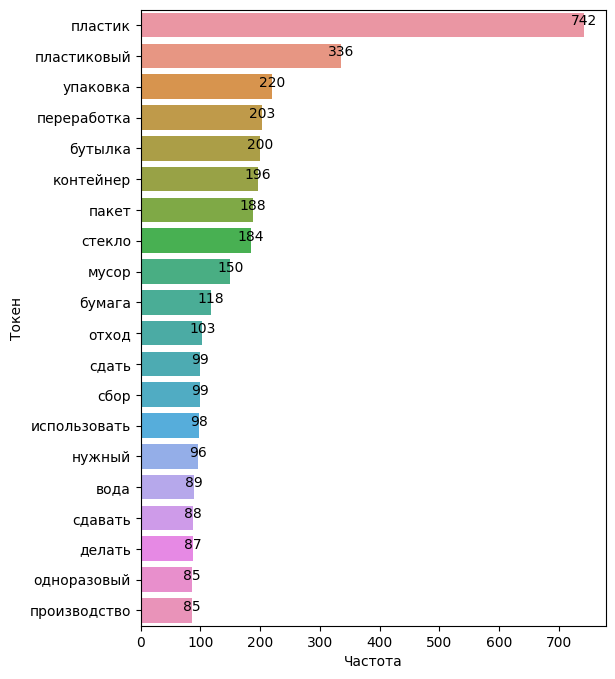

In [666]:
freq_vis(cmatrix_1_ntr)

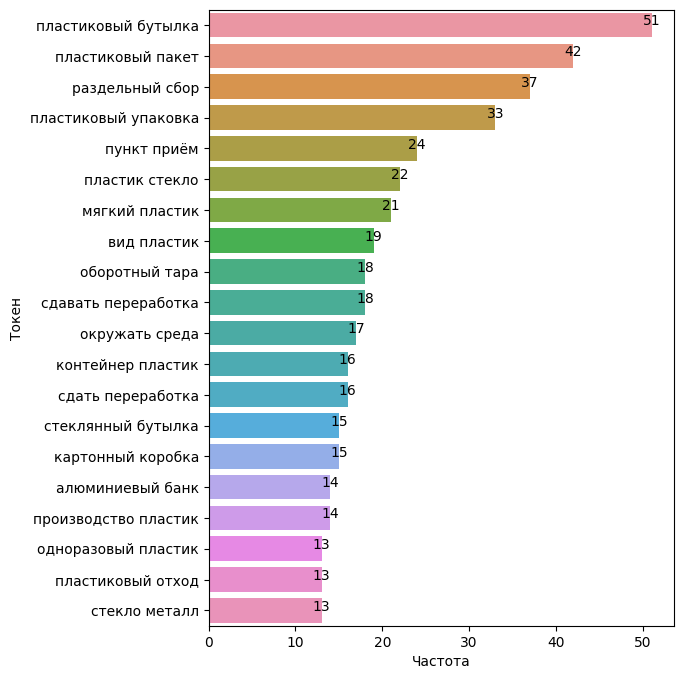

In [667]:
freq_vis(cmatrix_2_ntr)

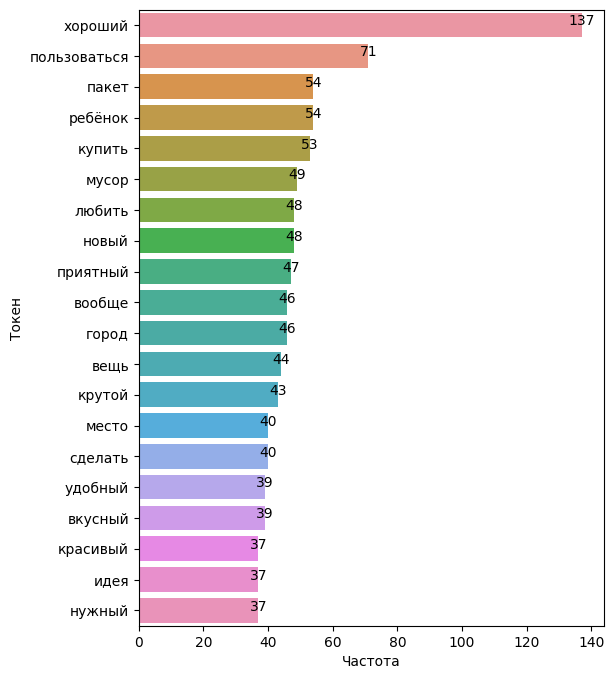

In [663]:
freq_vis(cmatrix_1_pos)

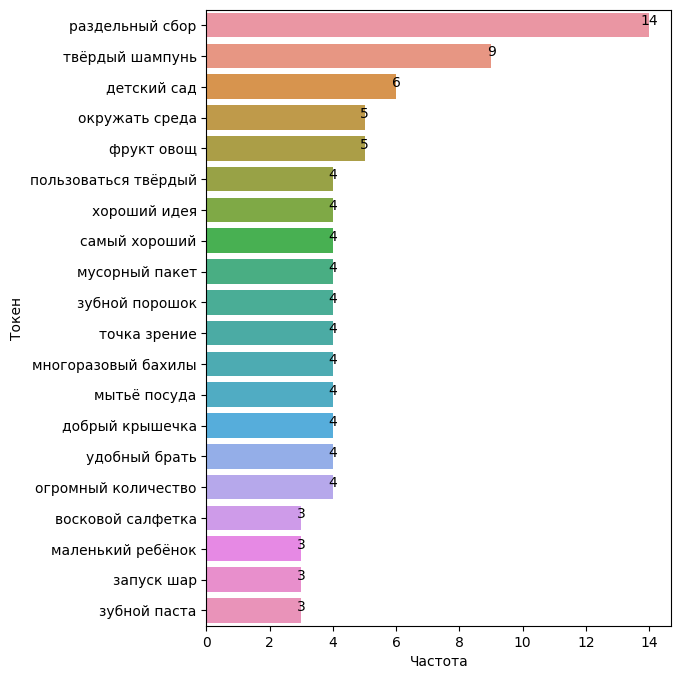

In [664]:
freq_vis(cmatrix_2_pos)

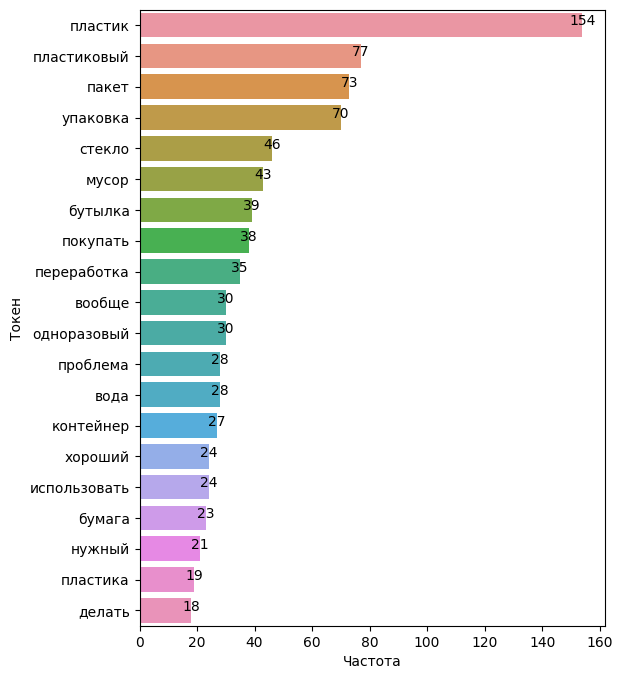

In [662]:
freq_vis(cmatrix_1_neg)

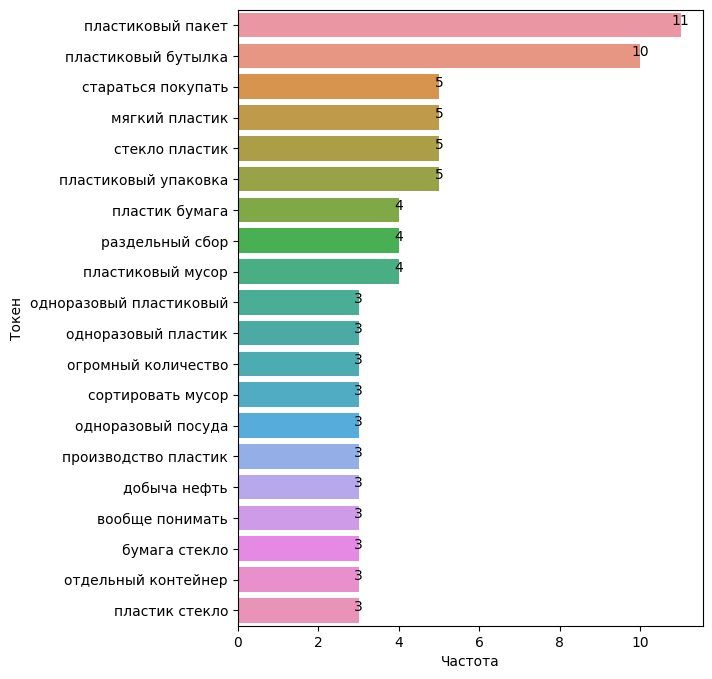

In [661]:
freq_vis(cmatrix_2_neg)

In [ ]:
topic_sent[(topic_sent.topic==0) & (topic_sent.Max_Column=='positive')].sort_values(by='Probability', ascending=False).raw_text.values

In [ ]:
topic_sent[(topic_sent.topic==1) & (topic_sent.Max_Column=='positive')].raw_text.values

In [ ]:
topic_sent[(topic_sent.topic==1) & (topic_sent.Max_Column=='negative')].raw_text.values

In [ ]:
topic_sent.groupby(['topic', 'Max_Column']).raw_text.count().to_frame().head(50)

In [583]:
for df in [topic_pos,topic_neg]:

    bigrams = df.text.apply(lambda x: generate_n_grams(x, 2))
    df[f'2_grams'] = bigrams

    df['2_grams_space'] = df['2_grams'].apply(lambda x: ' '.join(x))

In [ ]:
topic_pos

In [585]:
bert_pos = BERTopic(language="multilingual", calculate_probabilities=True,
                       verbose=True, 
                        nr_topics=25,
                       vectorizer_model=CountVectorizer(ngram_range=(1, 1))
                       )
docs_pos = topic_pos['2_grams_space'].to_list()
bert_topics_pos, bert_probs_pos = bert_pos.fit_transform(docs_pos)
coherence = get_coherence_bert(bert_pos, docs_pos)
coherence

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

2023-05-29 11:55:32,667 - BERTopic - Transformed documents to Embeddings
2023-05-29 11:55:38,562 - BERTopic - Reduced dimensionality
2023-05-29 11:55:38,623 - BERTopic - Clustered reduced embeddings
2023-05-29 11:55:38,769 - BERTopic - Reduced number of topics from 16 to 16


0.4515326228763089

In [ ]:
bert_pos.visualize_barchart(top_n_topics=25)

In [ ]:
bert_neg.visualize_barchart(top_n_topics=25)

In [586]:
bert_neg = BERTopic(language="multilingual", calculate_probabilities=True,
                       verbose=True, 
                        nr_topics=25,
                       vectorizer_model=CountVectorizer(ngram_range=(1, 1))
                       )
docs_neg = topic_neg['2_grams_space'].to_list()
bert_topics_neg, bert_probs_neg = bert_neg.fit_transform(docs_neg)
coherence = get_coherence_bert(bert_neg, docs_neg)
coherence

Batches:   0%|          | 0/104 [00:00<?, ?it/s]

2023-05-29 11:56:31,315 - BERTopic - Transformed documents to Embeddings
2023-05-29 11:56:46,326 - BERTopic - Reduced dimensionality
2023-05-29 11:56:46,530 - BERTopic - Clustered reduced embeddings
2023-05-29 11:56:46,879 - BERTopic - Reduced number of topics from 2 to 2


0.20054659419635712